In [1]:
install.packages("gridExtra")
install.packages("lubridate")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)
#library to plot two or more plots in a grid
library(gridExtra)
library(repr)
library(lubridate)


Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [3]:
tsDia1=as.data.frame(read.table("../plumber/logNormalSerie.txt"))
names(tsDia1)=c("Dia1")

locf=as.data.frame(read.table("../expOriginal/resultados/df_locf.txt"))
inter=as.data.frame(read.table("../expOriginal/resultados/df_linear_interpolation.txt"))
interp=as.data.frame(read.table("../expOriginal/resultados/df_interp.txt"))
mean=as.data.frame(read.table("../expOriginal/resultados/df_mean.txt"))
median=as.data.frame(read.table("../expOriginal/resultados/df_median.txt"))
mode=as.data.frame(read.table("../expOriginal/resultados/df_mode.txt"))
malExp=as.data.frame(read.table("../expOriginal/resultados/df_movingAverage_exponential.txt"))
malLin=as.data.frame(read.table("../expOriginal/resultados/df_movingAverage_linear.txt"))
malSim=as.data.frame(read.table("../expOriginal/resultados/df_movingAverage_simple.txt"))
spl=as.data.frame(read.table("../expOriginal/resultados/df_spline_interpolation.txt"))
sti=as.data.frame(read.table("../expOriginal/resultados/df_stine_interpolation.txt"))
seadec=as.data.frame(read.table("../expOriginal/resultados/df_seadec.txt"))
seasplit=as.data.frame(read.table("../expOriginal/resultados/df_seasplit.txt"))
ssa=as.data.frame(read.table("../expOriginal (copy)/resultados//df_ssa.txt"))

names(inter)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(interp)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(locf)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(mean)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(median)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(mode)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malExp)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malLin)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malSim)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(spl)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(sti)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(seadec)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(seasplit)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(ssa)=c("algoritmo" , "rmse", "mse", "mae", "mape")

todos=rbind(interp, inter, locf, mean, median, mode, malExp, malLin, malSim, spl, sti, seadec,seasplit, ssa)
#todos=rbind(malExp, malLin, malSim, seadec,seasplit)


In [4]:
todos$tamanho=rep(seq(100,10800,100), each=30)


In [132]:
head(todos)
summary(todos)

algoritmo rmse        mse          mae         mape       tamanho
1 interp    0.016880750 2.849597e-04 0.013933996 0.03155698 100    
2 interp    0.013755131 1.892036e-04 0.012189197 0.07527516 100    
3 interp    0.008724705 7.612047e-05 0.007264747 0.01261077 100    
4 interp    0.035092226 1.231464e-03 0.030979604 0.03185910 100    
5 interp    0.008889017 7.901462e-05 0.007186881 0.02759596 100    
6 interp    0.014588844 2.128344e-04 0.013040737 0.01854832 100

                algoritmo          rmse                mse          
 interp              : 3240   Min.   : 0.004758   Min.   :  0.0000  
 linear_interpolation: 3240   1st Qu.: 0.065937   1st Qu.:  0.0043  
 locf                : 3240   Median : 0.118099   Median :  0.0139  
 mean                : 3240   Mean   : 0.354274   Mean   :  1.0693  
 median              : 3240   3rd Qu.: 0.281448   3rd Qu.:  0.0792  
 mode                : 3240   Max.   :26.201487   Max.   :686.5179  
 (Other)             :25920                                         
      mae                 mape             tamanho     
 Min.   : 0.003611   Min.   :  0.0061   Min.   :  100  
 1st Qu.: 0.054185   1st Qu.:  0.1227   1st Qu.: 2775  
 Median : 0.099082   Median :  0.2863   Median : 5450  
 Mean   : 0.311531   Mean   :  1.6156   Mean   : 5450  
 3rd Qu.: 0.252350   3rd Qu.:  0.9232   3rd Qu.: 8125  
 Max.   :22.769164   Max.   :422.5827   Max.   :10800  
                                                       

In [133]:
summary(todos)

                algoritmo          rmse                mse          
 interp              : 3240   Min.   : 0.004758   Min.   :  0.0000  
 linear_interpolation: 3240   1st Qu.: 0.065937   1st Qu.:  0.0043  
 locf                : 3240   Median : 0.118099   Median :  0.0139  
 mean                : 3240   Mean   : 0.354274   Mean   :  1.0693  
 median              : 3240   3rd Qu.: 0.281448   3rd Qu.:  0.0792  
 mode                : 3240   Max.   :26.201487   Max.   :686.5179  
 (Other)             :25920                                         
      mae                 mape             tamanho     
 Min.   : 0.003611   Min.   :  0.0061   Min.   :  100  
 1st Qu.: 0.054185   1st Qu.:  0.1227   1st Qu.: 2775  
 Median : 0.099082   Median :  0.2863   Median : 5450  
 Mean   : 0.311531   Mean   :  1.6156   Mean   : 5450  
 3rd Qu.: 0.252350   3rd Qu.:  0.9232   3rd Qu.: 8125  
 Max.   :22.769164   Max.   :422.5827   Max.   :10800  
                                                       

In [172]:
todosMedia=todos %>%
  group_by(algoritmo, tamanho) %>%
  summarize(mean = mean(rmse, na.rm = TRUE))

sdTodosMedia = todos %>% group_by(algoritmo, tamanho) %>%
summarize(sd=sd(rmse, na.rm=TRUE))
todosMedia$sd=sdTodosMedia$sd

n=90 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200...
error=qnorm(0.975)*todosMedia$sd/sqrt(n)
todosMedia$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.2) # move them .05 to the left and right

head(todosMedia)

algoritmo tamanho mean       sd          error      
1 interp    100     0.01363039 0.006732779 0.001390981
2 interp    200     0.01819610 0.007422871 0.001533553
3 interp    300     0.02268847 0.008447936 0.001745330
4 interp    400     0.02739236 0.011030422 0.002278867
5 interp    500     0.02662368 0.009079320 0.001875773
6 interp    600     0.03259934 0.009148035 0.001889969

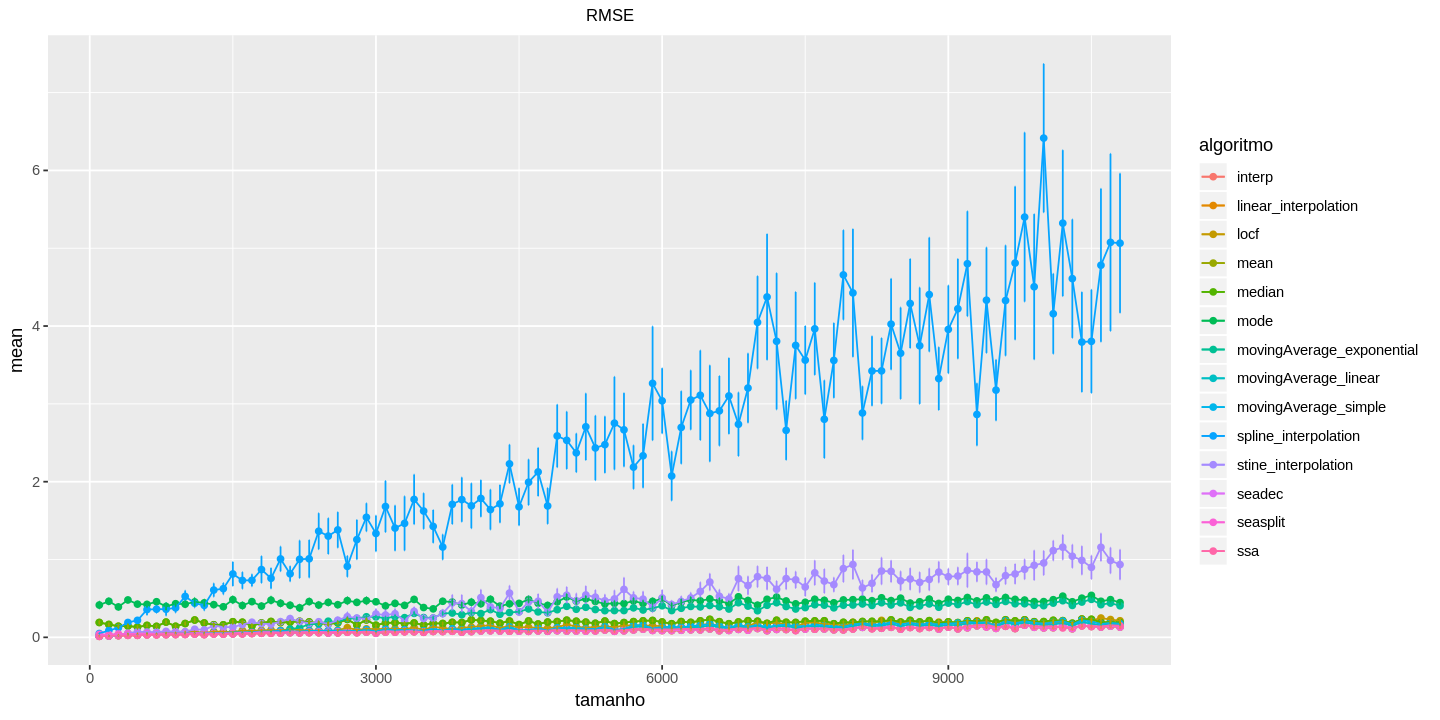

In [135]:
options(repr.plot.width=12)
rmse=ggplot(todosMedia, aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    ggtitle("RMSE")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
      #  theme(axis.text=element_text(size=1))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())
rmse

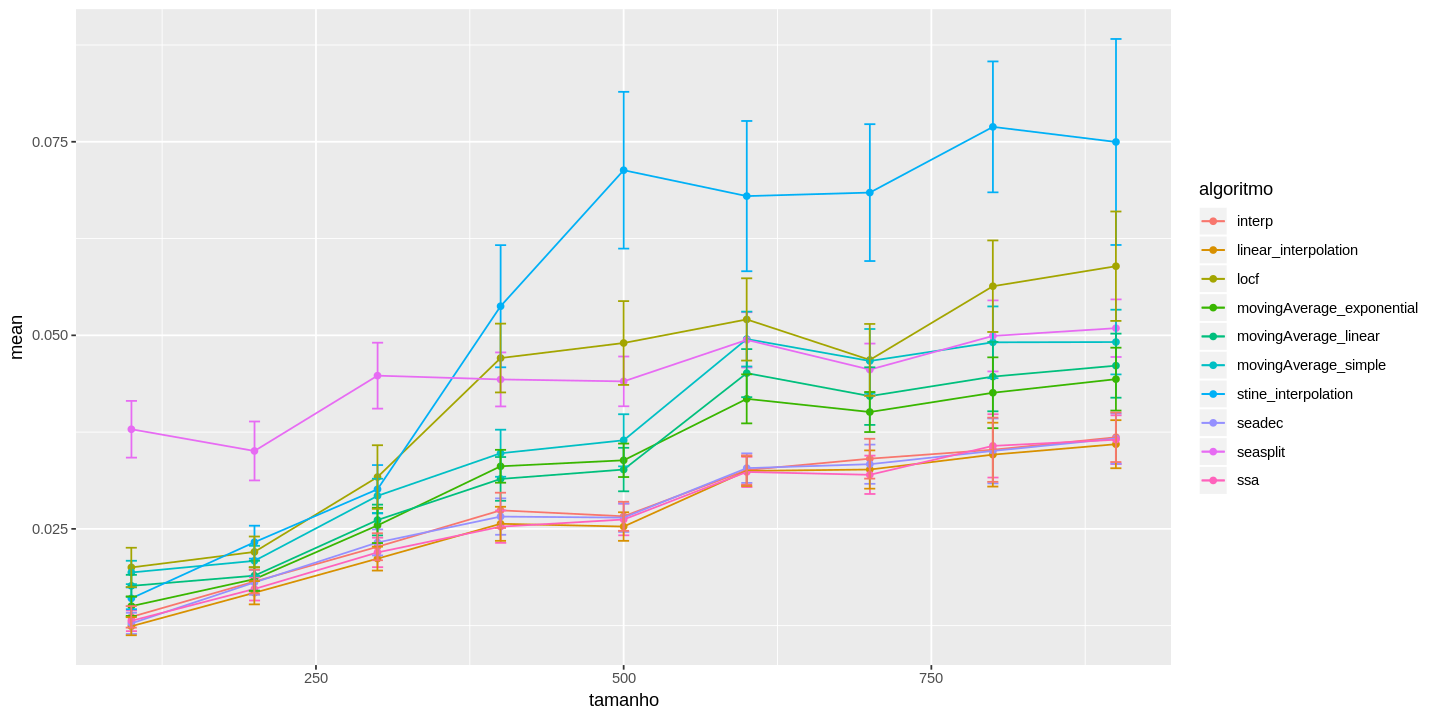

In [136]:
options(repr.plot.width=12, repr.plot.height=6)
    ggplot(todosMedia[which(todosMedia$tamanho<1000 & todosMedia$algoritmo!="spline_interpolation" & todosMedia$algoritmo!="mode" & todosMedia$algoritmo!="mean" & todosMedia$algoritmo!="median"),], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +

      #  theme(axis.text=element_text(size=1))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

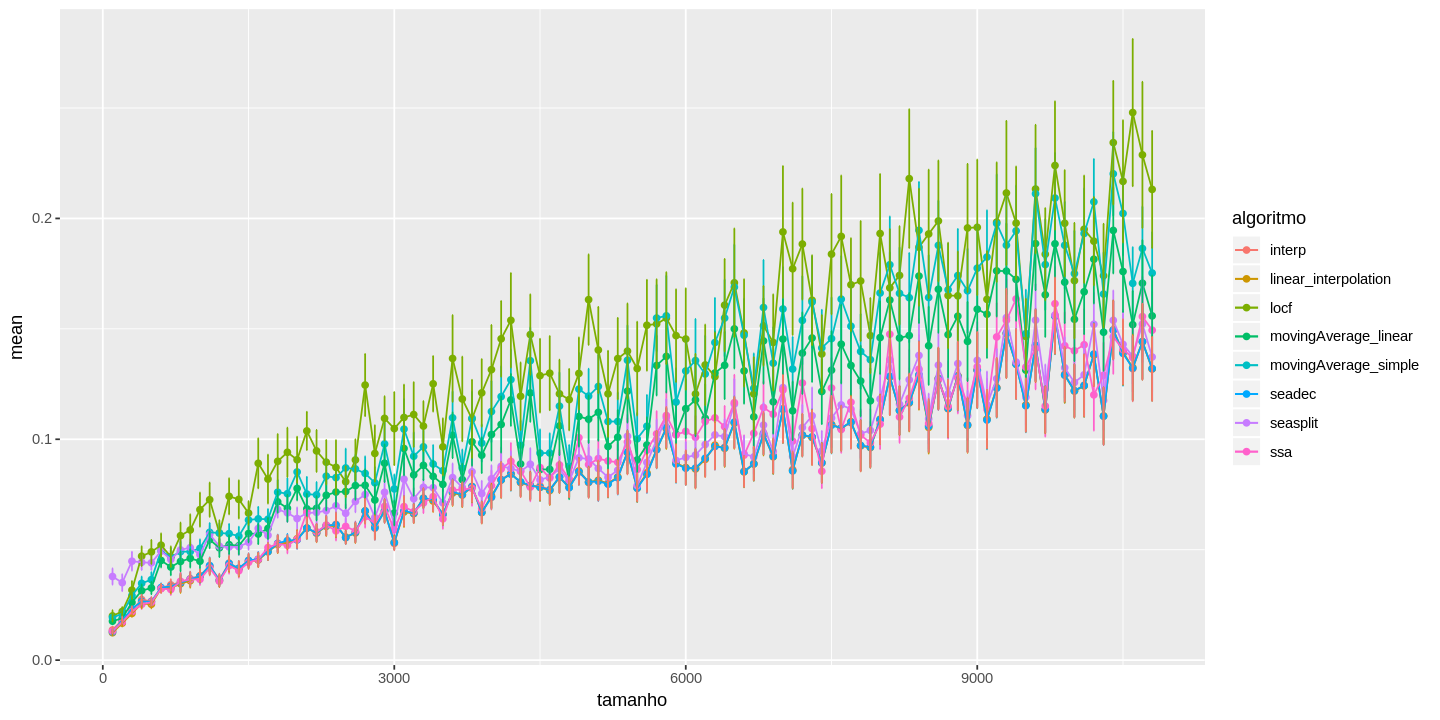

In [137]:
options(repr.plot.width=12, repr.plot.height=6)
    ggplot(todosMedia[which(todosMedia$algoritmo!="spline_interpolation" & todosMedia$algoritmo!="mode" & todosMedia$algoritmo!="mean" & todosMedia$algoritmo!="median" & todosMedia$algoritmo!="movingAverage_exponential" & todosMedia$algoritmo!="stine_interpolation" ) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +

      #  theme(axis.text=element_text(size=1))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

Comparação entre as médias móveis
===


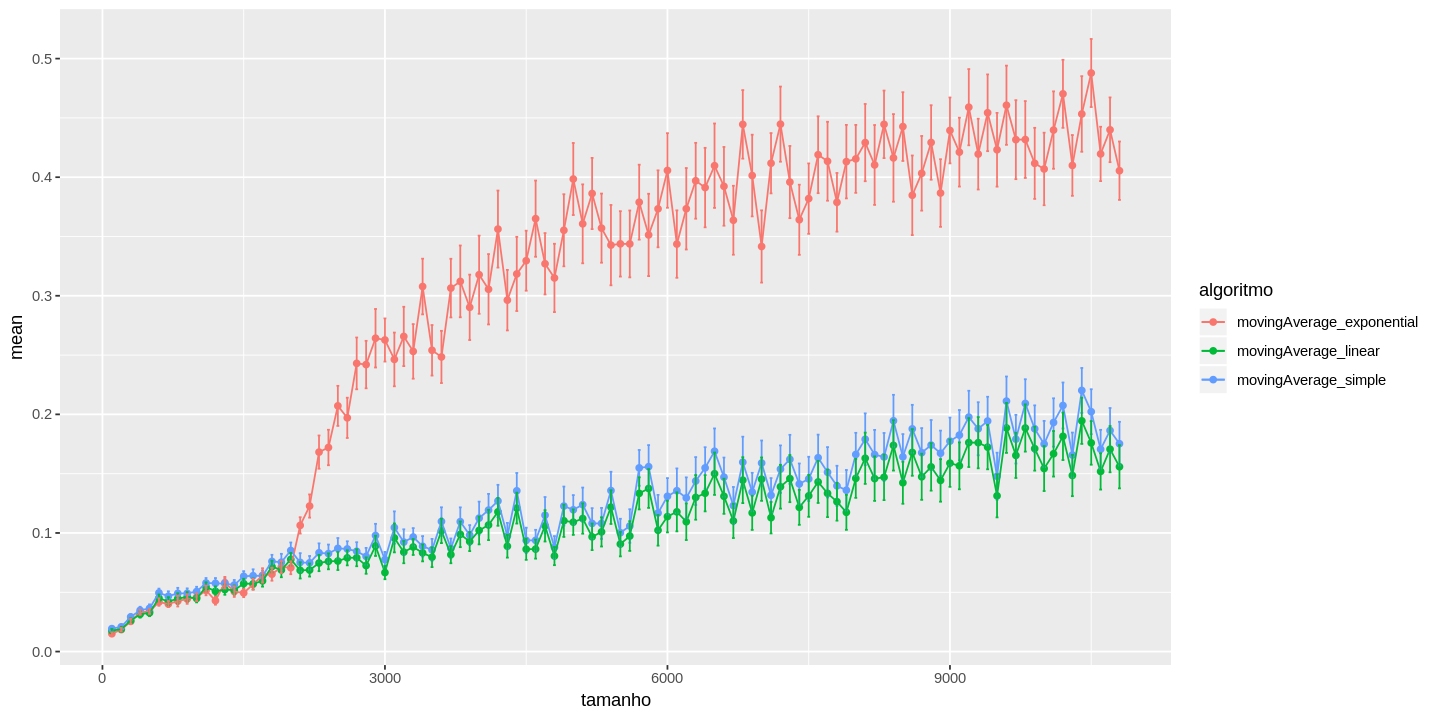

In [138]:
options(repr.plot.width=12, repr.plot.height=6)
    ggplot(todosMedia[which(todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="movingAverage_simple" | todosMedia$algoritmo=="movingAverage_exponential") ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +

      #  theme(axis.text=element_text(size=1))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

Comparação entre algoritmos rápidos
===
O melhor algoritmo rápido em relação ao RMSE é o Locf

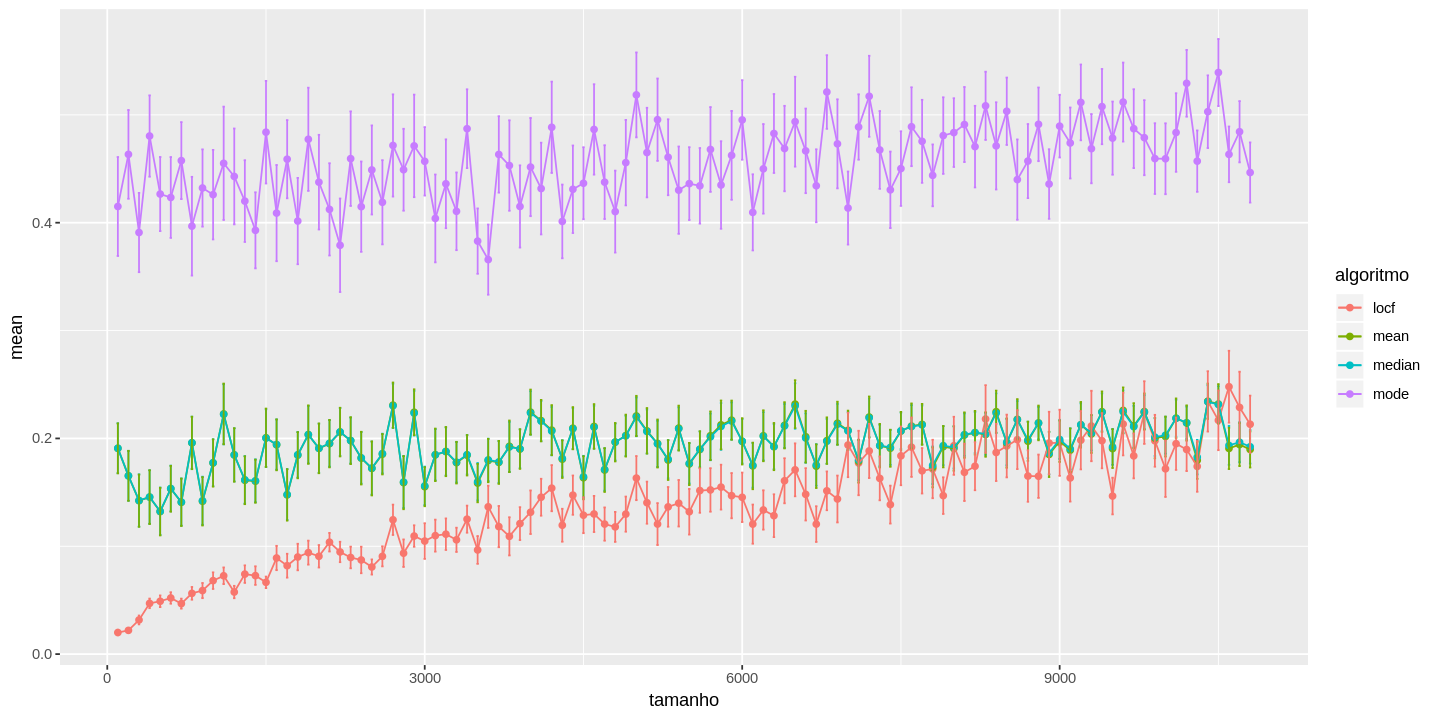

In [139]:
options(repr.plot.width=12, repr.plot.height=6)
    ggplot(todosMedia[which(todosMedia$algoritmo=="mean" | todosMedia$algoritmo=="median" | todosMedia$algoritmo=="locf" | todosMedia$algoritmo=="mode") ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +

      #  theme(axis.text=element_text(size=1))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

Comparação entre interpolações
==
Spline tem o desempenho pobre ruim em relação ao stine


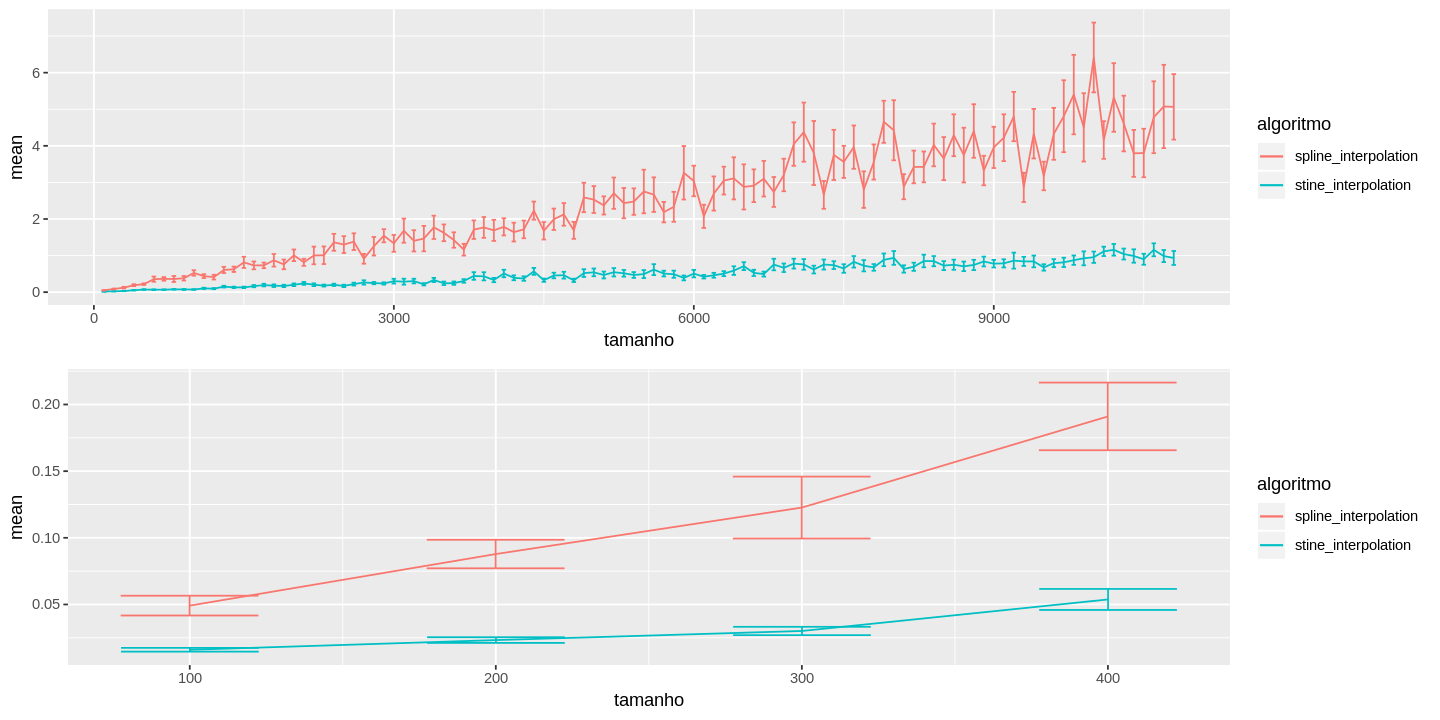

In [142]:
options(repr.plot.width=12)
 a=   ggplot(todosMedia[which((todosMedia$algoritmo=="spline_interpolation" | todosMedia$algoritmo=="stine_interpolation")) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
b= ggplot(todosMedia[which((todosMedia$algoritmo=="spline_interpolation" | todosMedia$algoritmo=="stine_interpolation") & todosMedia$tamanho<500) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
grid.arrange(a,b, ncol=1)

Comparação entre os algoritmos mais robustos
==
Seadec e SSA são iguais estatisticamente. 
Resolveu-se utilizar apenas o seasplit. 

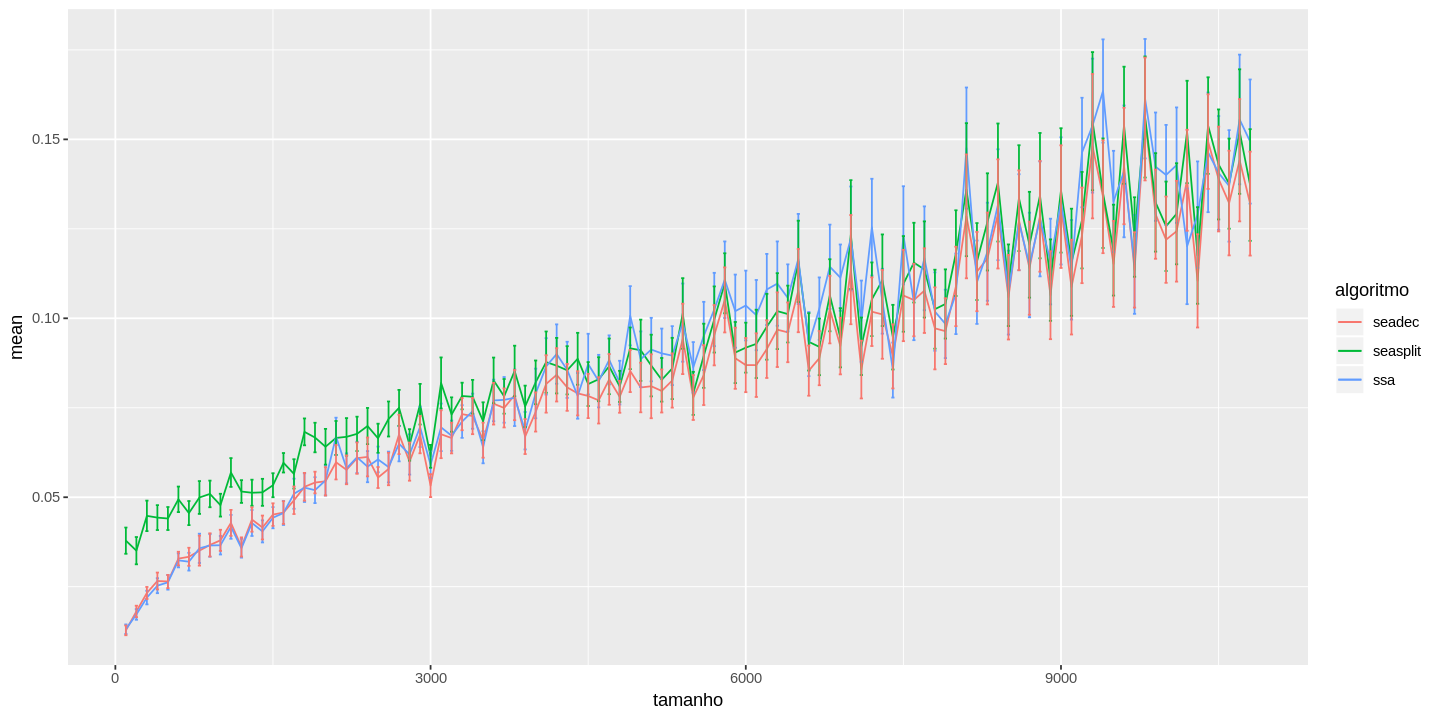

In [144]:
options(repr.plot.width=12)
 a=   ggplot(todosMedia[which((todosMedia$algoritmo=="seadec" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="ssa")) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
a

Comparação entre os melhores algoritmos de cada categoria
==

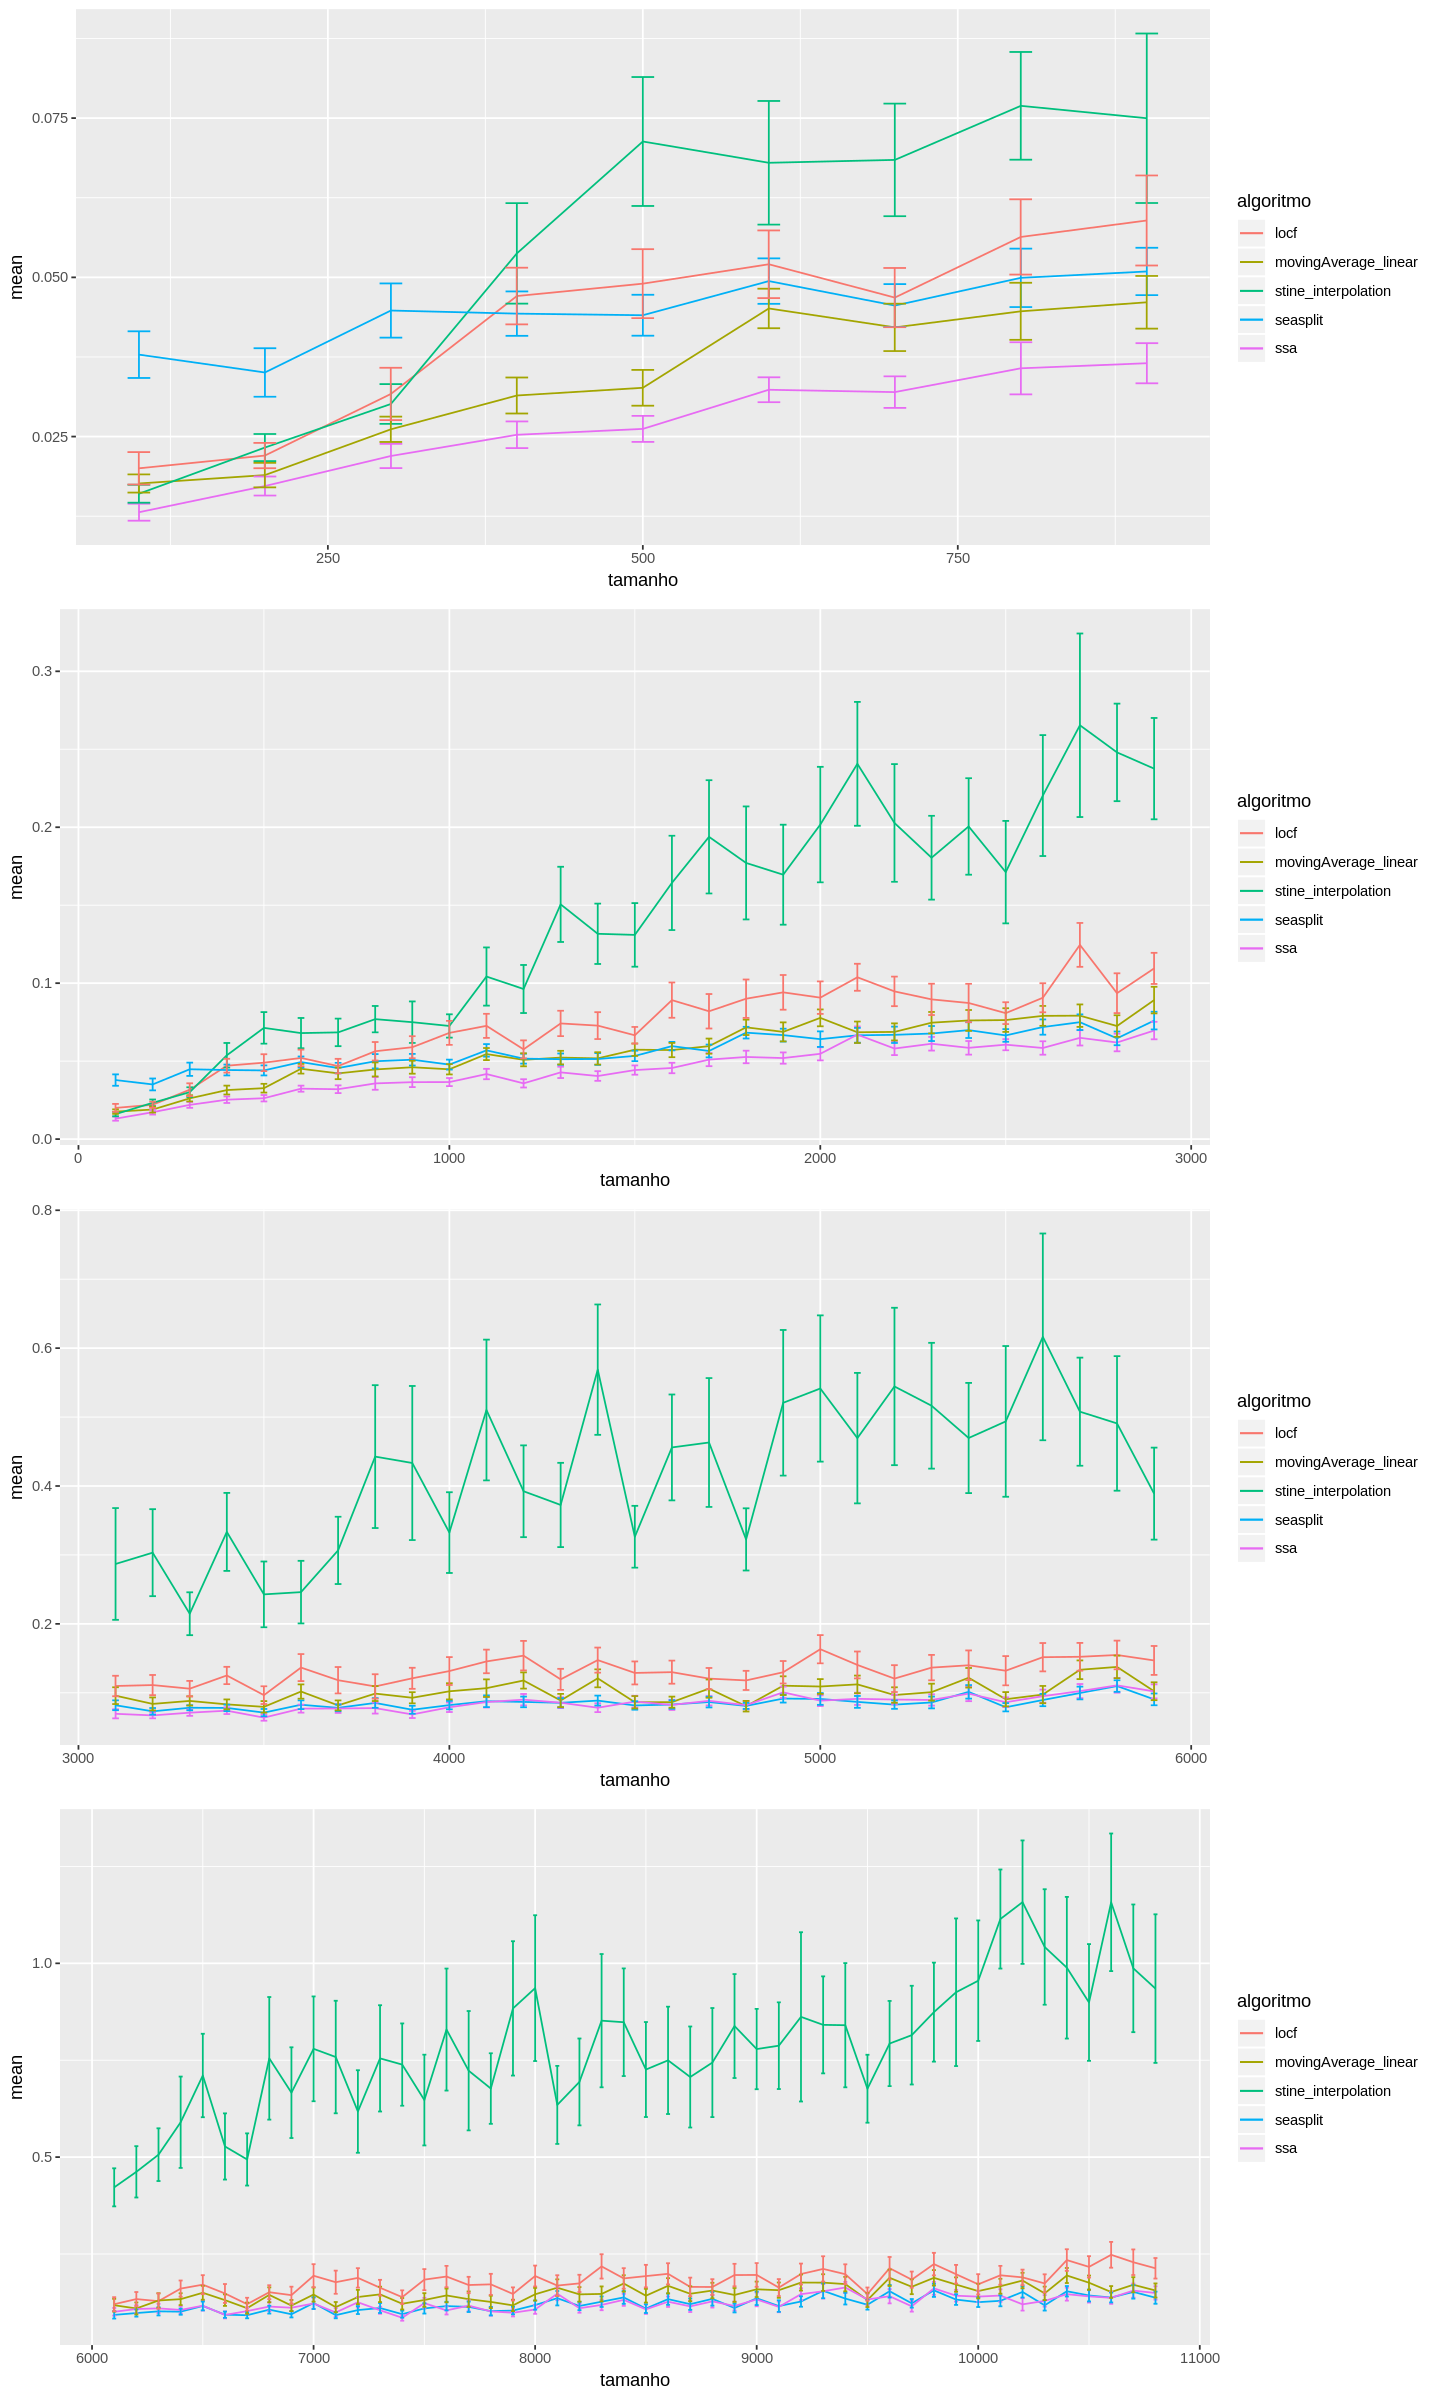

In [174]:

q0=ggplot(todosMedia[which((todosMedia$algoritmo=="stine_interpolation" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho<1000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
q1=ggplot(todosMedia[which((todosMedia$algoritmo=="stine_interpolation" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho<3000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
q2=ggplot(todosMedia[which((todosMedia$algoritmo=="stine_interpolation" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho>3000 & todosMedia$tamanho<6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

q3= ggplot(todosMedia[which((todosMedia$algoritmo=="stine_interpolation" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho>6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

grid.arrange(q0, q1, q2,q3, ncol=1)



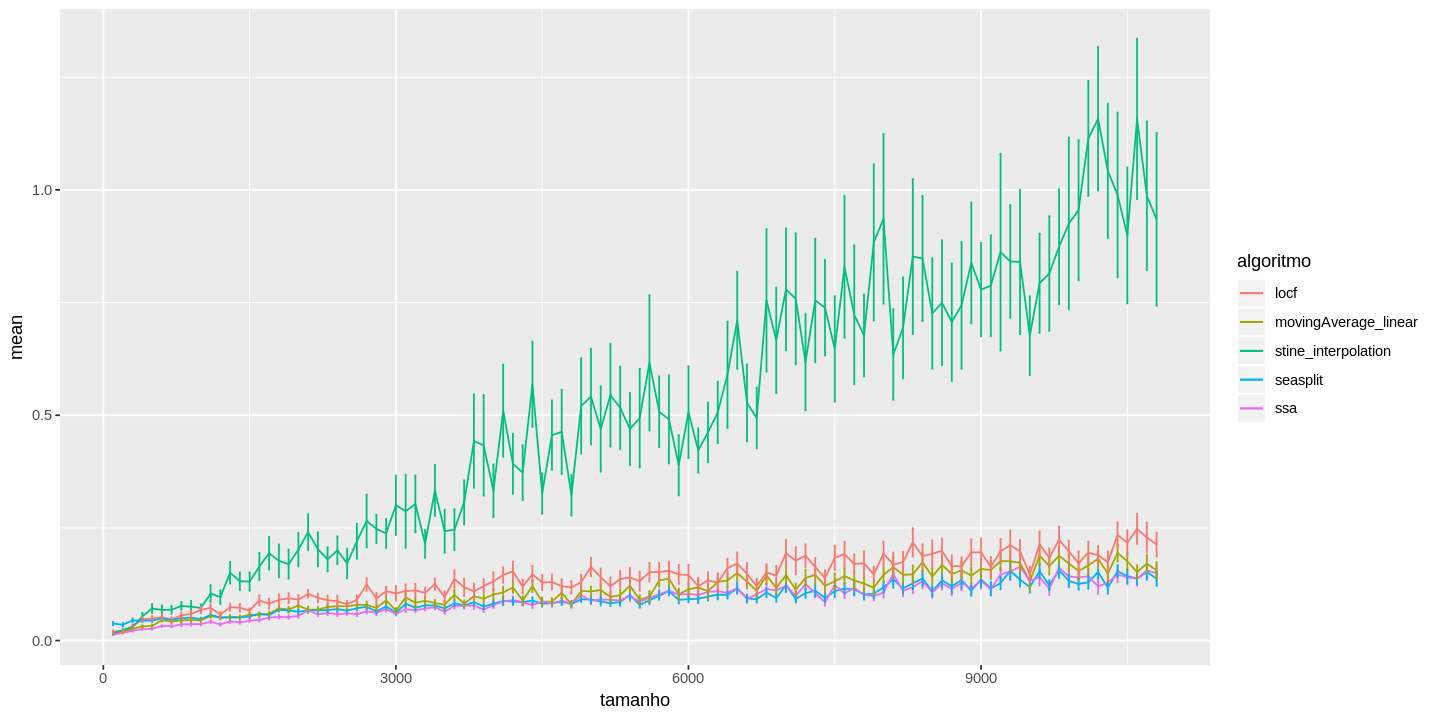

In [177]:
options(repr.plot.width=12, repr.plot.height=6)

rmseMelhores=ggplot(todosMedia[which((todosMedia$algoritmo=="stine_interpolation" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf")) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
rmseMelhores

Comparação enttre os melhores algoritmos de cada categoria
==
Sem Stine. 
NOTA:
--
SSA é o melhor algoritmo para lacunas grandes consecutivas até próximo a 3000 perdas. A partir daí, se iguala estatisticamente com seasplit e depois de 6000 ambos se igualam a media móvel linear 

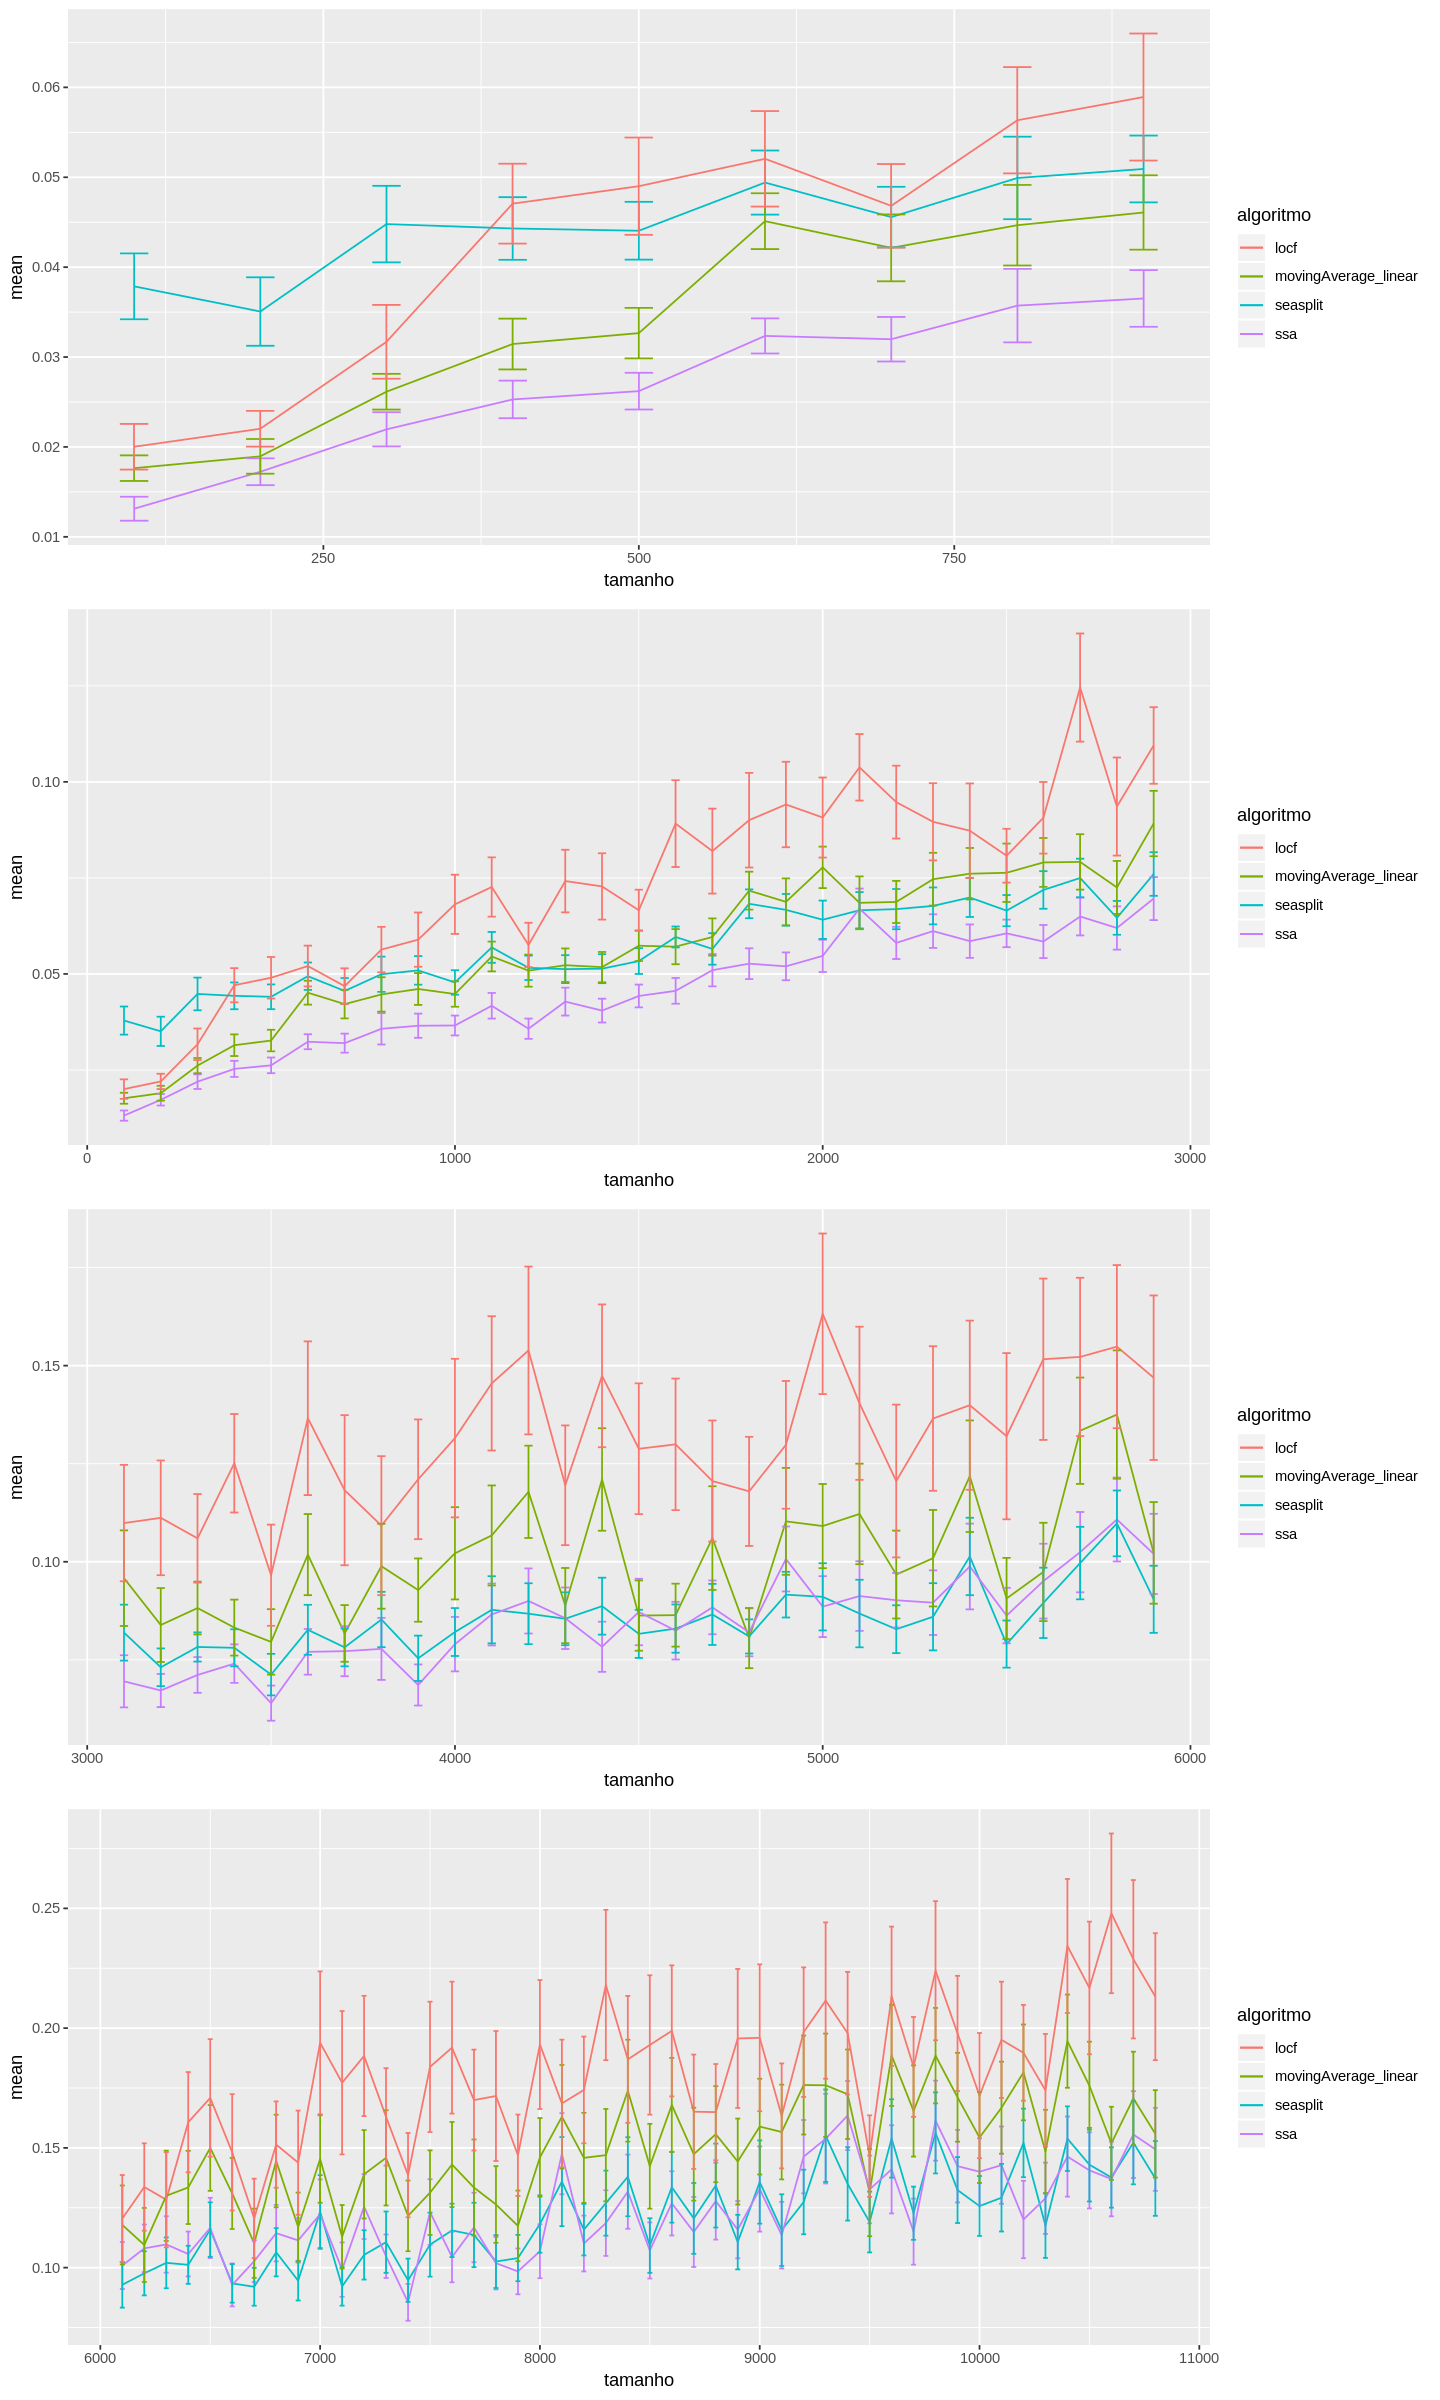

In [153]:
options(repr.plot.width=12, repr.plot.height=20)
q0=ggplot(todosMedia[which((todosMedia$algoritmo=="" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho<1000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
q1=ggplot(todosMedia[which((todosMedia$algoritmo=="" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho<3000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
q2=ggplot(todosMedia[which((todosMedia$algoritmo=="" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho>3000 & todosMedia$tamanho<6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

q3= ggplot(todosMedia[which((todosMedia$algoritmo=="" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho>6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

grid.arrange(q0, q1, q2,q3, ncol=1)

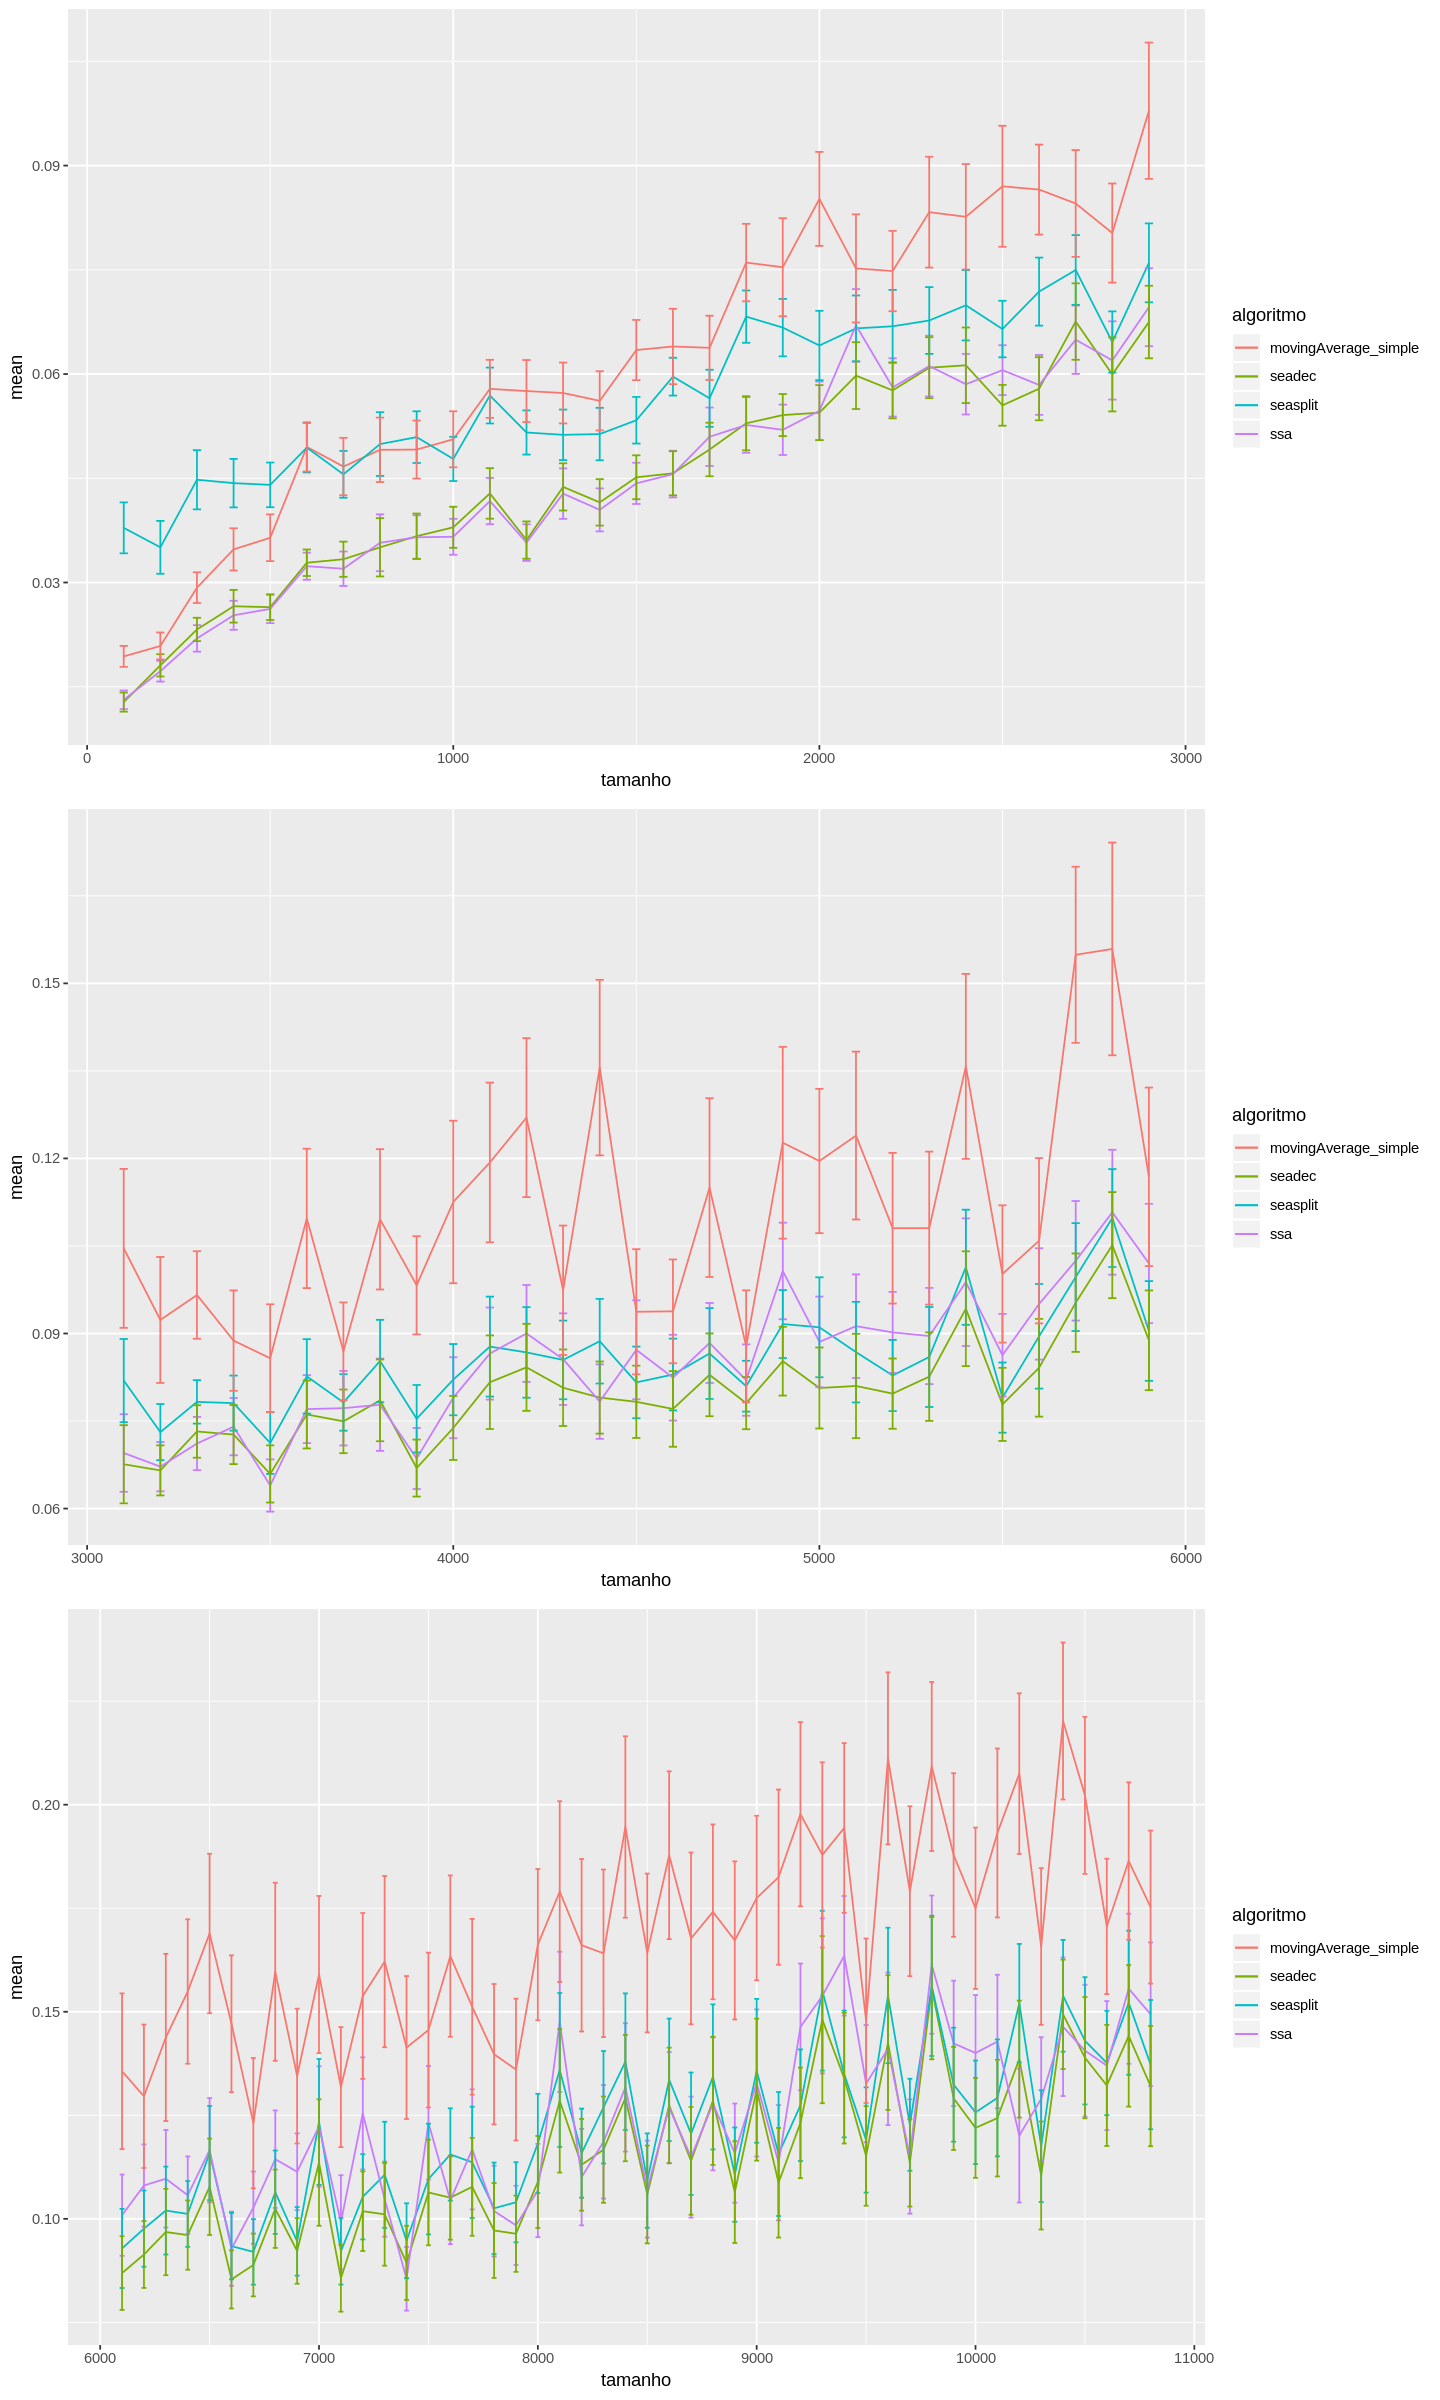

In [89]:
options(repr.plot.width=12, repr.plot.height=20)
q1=ggplot(todosMedia[which((todosMedia$algoritmo=="seadec" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_simple" | todosMedia$algoritmo=="ssa") & todosMedia$tamanho<3000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())
q2=ggplot(todosMedia[which((todosMedia$algoritmo=="seadec" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_simple" | todosMedia$algoritmo=="ssa") & todosMedia$tamanho>3000 & todosMedia$tamanho<6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

q3= ggplot(todosMedia[which((todosMedia$algoritmo=="seadec" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_simple" | todosMedia$algoritmo=="ssa")  & todosMedia$tamanho>6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

grid.arrange(q1, q2,q3, ncol=1)

Nota
---
Iterpolação, seadec e ssa são iguais estatisticamente


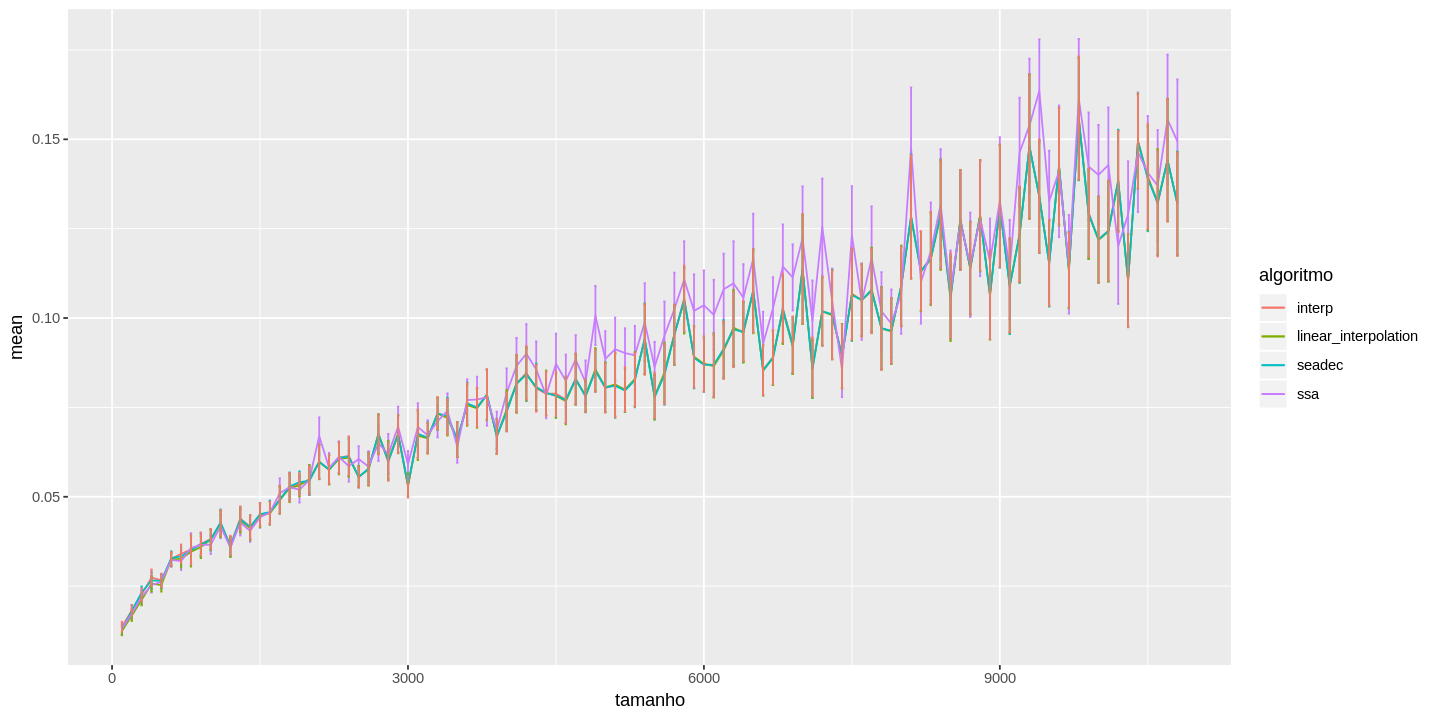

In [36]:
options(repr.plot.width=12, repr.plot.height=6)
    ggplot(todosMedia[which(todosMedia$algoritmo=="interp"| todosMedia$algoritmo=="linear_interpolation" | todosMedia$algoritmo=="seadec"| todosMedia$algoritmo=="ssa") ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +

    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())


Nota
===
Os algoritmos Seasplit e SSA apresentam comportamentos distintos. 
De 100 a 3000 o SSA é melhor que o Seasplit, entretanto, após esse pontos os dois convergem para a igualdade. 

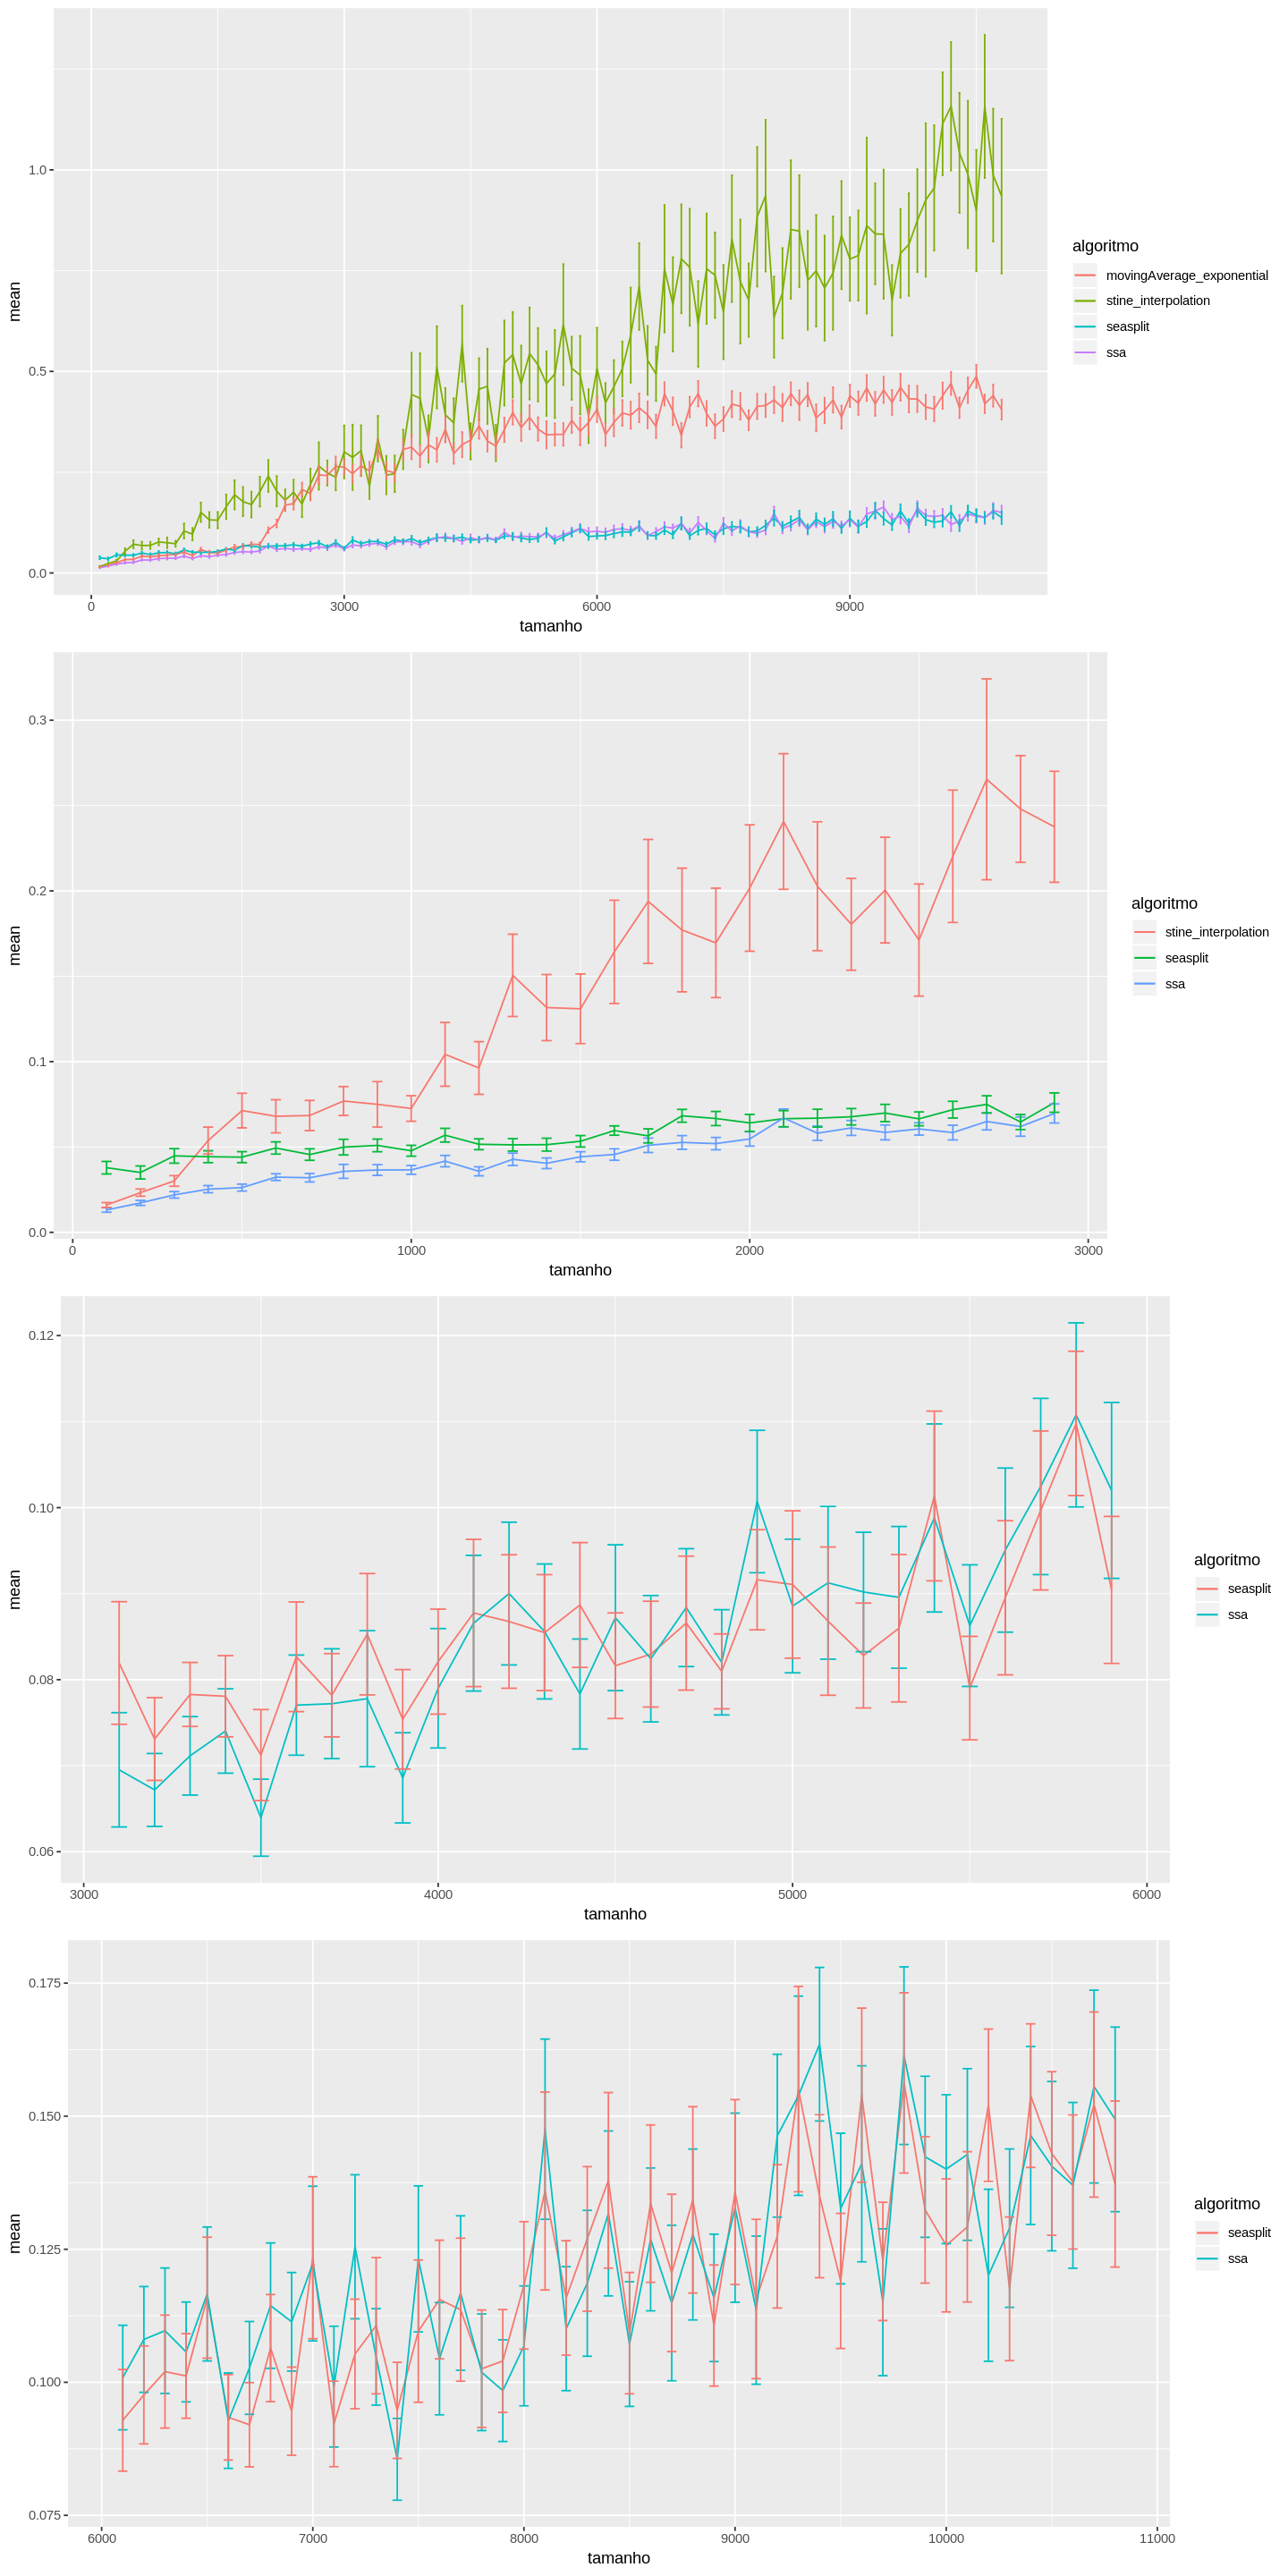

In [93]:
options(repr.plot.width=12, repr.plot.height=24)
   q1= ggplot(todosMedia[which(todosMedia$algoritmo=="seasplit"| todosMedia$algoritmo=="ssa" |  todosMedia$algoritmo=="movingAverage_exponential" |  todosMedia$algoritmo=="stine_interpolation") ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

q2=ggplot(todosMedia[which((todosMedia$tamanho<3000) & (todosMedia$algoritmo=="seasplit"| todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="stine_interpolation")) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

q3=ggplot(todosMedia[which((todosMedia$tamanho>3000 & todosMedia$tamanho<6000 ) & (todosMedia$algoritmo=="seasplit"| todosMedia$algoritmo=="ssa" )) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

q4=ggplot(todosMedia[which((todosMedia$tamanho>6000) & (todosMedia$algoritmo=="seasplit"| todosMedia$algoritmo=="ssa")) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())
grid.arrange(q1,q2,q3,q4, ncol=1)

In [281]:
a= todosMedia[which(todosMedia$algoritmo=="interp" | todosMedia$algoritmo=="linear_interpolation" | todosMedia$algoritmo=="seadec") ,]
by_alg=arrange(a, tamanho, mean)
by_alg=group_by(a, tamanho, algoritmo)
by_length=summarise(by_alg, media=min(mean))
a=by_length%>% filter(media==min(media))
a

tamanho algoritmo            media     
1    100    linear_interpolation 0.01242426
2    200    linear_interpolation 0.01675062
3    300    linear_interpolation 0.02115881
4    400    linear_interpolation 0.02565532
5    500    linear_interpolation 0.02529887
6    600    linear_interpolation 0.03248869
7    700    linear_interpolation 0.03266407
8    800    linear_interpolation 0.03458787
9    900    linear_interpolation 0.03593640
10  1000    seadec               0.03794836
11  1100    linear_interpolation 0.04238055
12  1200    linear_interpolation 0.03594411
13  1300    linear_interpolation 0.04328606
14  1400    linear_interpolation 0.04123704
15  1500    linear_interpolation 0.04468345
16  1600    linear_interpolation 0.04534693
17  1700    linear_interpolation 0.04907420
18  1800    linear_interpolation 0.05241557
19  1900    linear_interpolation 0.05315352
20  2000    seadec               0.05444202
21  2100    linear_interpolation 0.05975900
22  2200    linear_interpolation 0.05749951
23  2300    linear_interpolation 0.06058710
24  2400    linear_interpolation 0.06090101
25  2500    interp               0.05546364
26  2600    linear_interpolation 0.05758166
27  2700    interp               0.06736472
28  2800    interp               0.05976526
29  2900    interp               0.06741817
30  3000    interp               0.05284943
⋮   ⋮       ⋮                    ⋮         
79   7900   linear_interpolation 0.09624721
80   8000   interp               0.10876231
81   8100   linear_interpolation 0.12820010
82   8200   linear_interpolation 0.11298290
83   8300   linear_interpolation 0.11642870
84   8400   linear_interpolation 0.12871059
85   8500   linear_interpolation 0.10536388
86   8600   seadec               0.12738482
87   8700   linear_interpolation 0.11386841
88   8800   seadec               0.12849353
89   8900   linear_interpolation 0.10627941
90   9000   seadec               0.13120090
91   9100   seadec               0.10871741
92   9200   seadec               0.12317603
93   9300   linear_interpolation 0.14782023
94   9400   seadec               0.13396307
95   9500   seadec               0.11519029
96   9600   linear_interpolation 0.14228001
97   9700   linear_interpolation 0.11330406
98   9800   seadec               0.15569230
99   9900   linear_interpolation 0.12902044
100 10000   linear_interpolation 0.12182969
101 10100   linear_interpolation 0.12415772
102 10200   interp               0.13820187
103 10300   seadec               0.11046374
104 10400   interp               0.14935272
105 10500   seadec               0.13891568
106 10600   interp               0.13197573
107 10700   interp               0.14413432
108 10800   interp               0.13182464

Métrica: MAPE
---
Como pode ser visto abaixo os resultados do MAPE foram muito ruins! 


In [159]:
todosMedia=todos %>%
  group_by(algoritmo, tamanho) %>%
  summarize(mean = mean(mape, na.rm = TRUE))
#head(todosMedia)
sdTodosMedia = todos %>% group_by(algoritmo, tamanho) %>%
summarize(sd=sd(mape, na.rm=TRUE))
todosMedia$sd=sdTodosMedia$sd

n=90 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200...
error=qnorm(0.975)*todosMedia$sd/sqrt(n)
todosMedia$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.2) # move them .05 to the left and right

head(todosMedia)



algoritmo tamanho mean       sd         error      
1 interp    100     0.03735700 0.02661134 0.005497859
2 interp    200     0.03992885 0.02521403 0.005209177
3 interp    300     0.63388578 3.10946400 0.642410113
4 interp    400     0.05658240 0.03934521 0.008128655
5 interp    500     0.05925436 0.02964115 0.006123812
6 interp    600     0.08540392 0.06646808 0.013732196

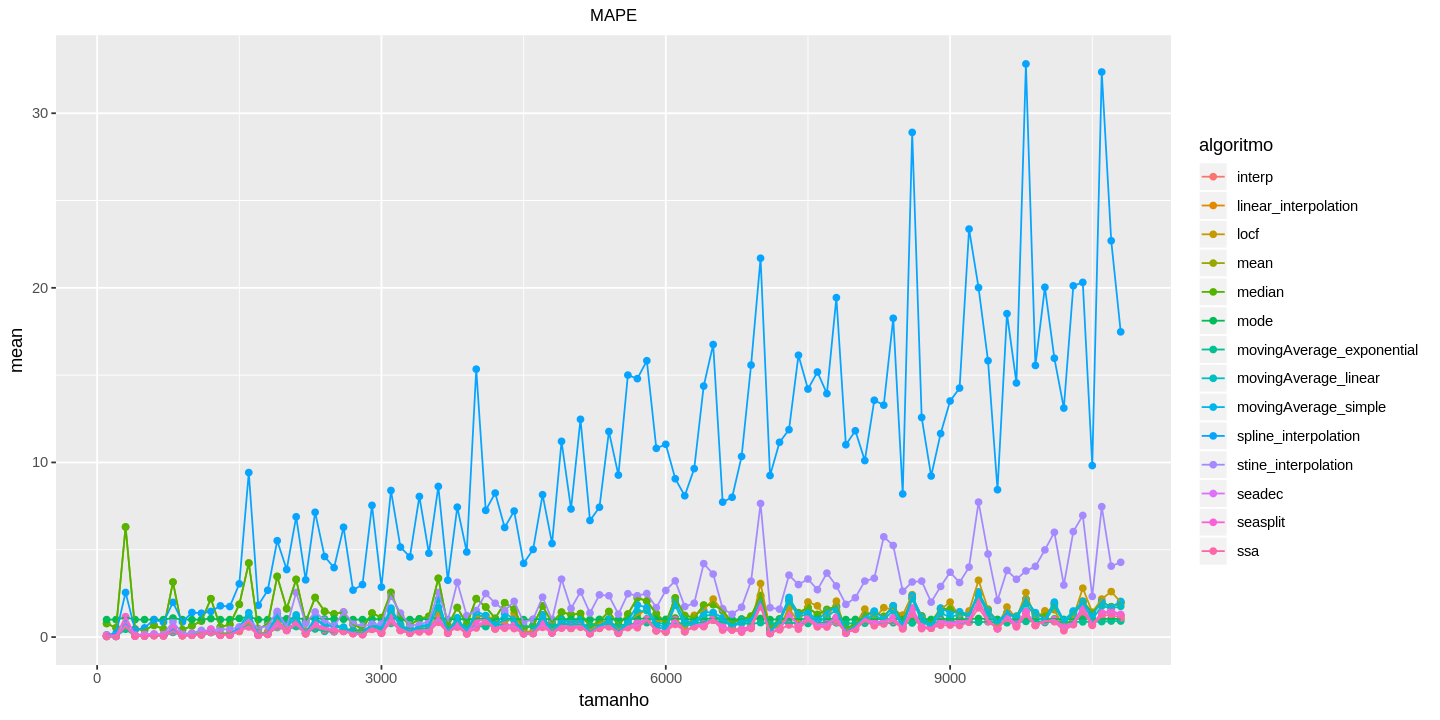

In [158]:
options(repr.plot.width=12, repr.plot.height=6)
mape=ggplot(todosMedia, aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    ggtitle("MAPE")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
mape

Comparação entre as médias móveis
===
Média móvel exponencial tem melhores resultados e o intervalo de confiança menor que as outras médias móveis

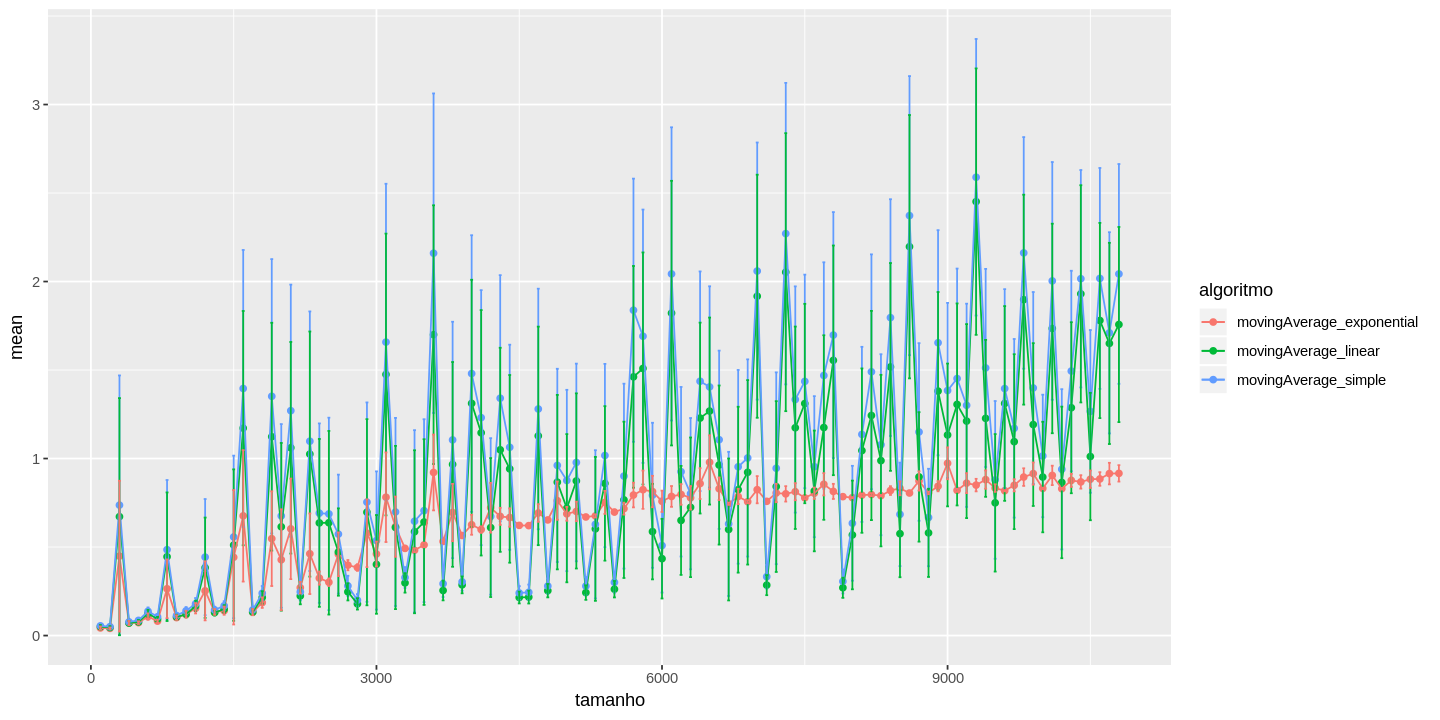

In [162]:
options(repr.plot.width=12, repr.plot.height=6)
    ggplot(todosMedia[which(todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="movingAverage_simple" | todosMedia$algoritmo=="movingAverage_exponential") ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))


Comparação entre algoritmos rápidos
===
O melhor algoritmo rápido em relação ao RMSE é o Locf até 3000, depois disso, iguala-se estatisticamente a outros algoritmos

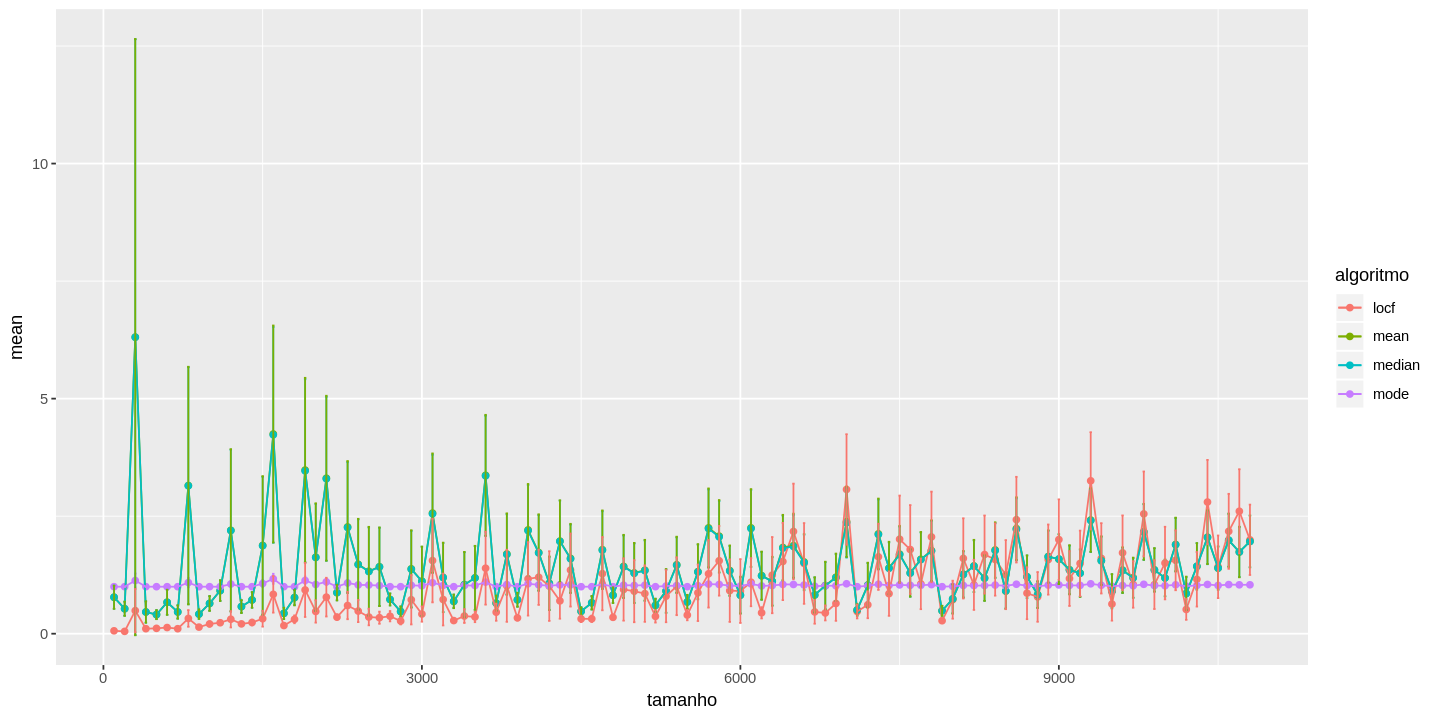

In [163]:
options(repr.plot.width=12, repr.plot.height=6)
    ggplot(todosMedia[which(todosMedia$algoritmo=="mean" | todosMedia$algoritmo=="median" | todosMedia$algoritmo=="locf" | todosMedia$algoritmo=="mode") ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +

      #  theme(axis.text=element_text(size=1))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

Comparação entre interpolações
==
Spline tem o desempenho pobre ruim em relação ao stine


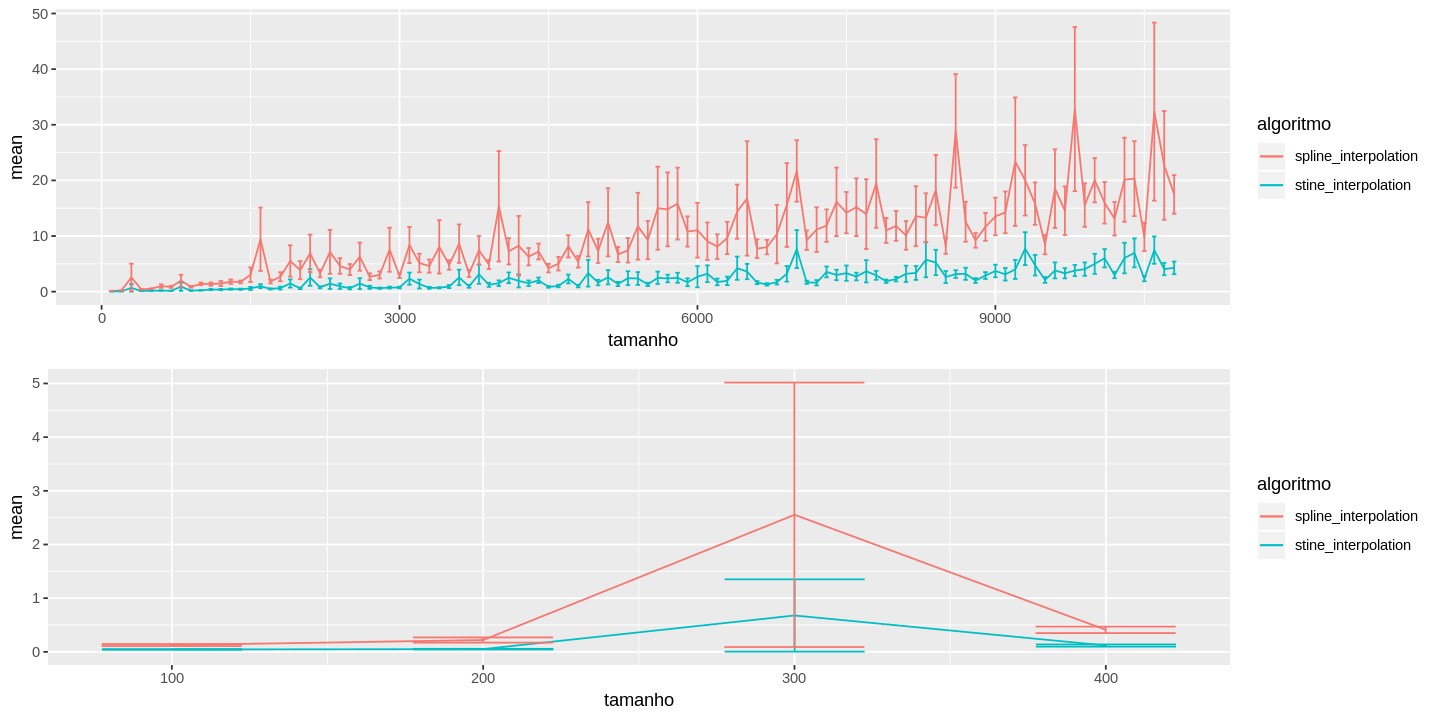

In [166]:
options(repr.plot.width=12)
 a=   ggplot(todosMedia[which((todosMedia$algoritmo=="spline_interpolation" | todosMedia$algoritmo=="stine_interpolation")) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
b= ggplot(todosMedia[which((todosMedia$algoritmo=="spline_interpolation" | todosMedia$algoritmo=="stine_interpolation") & todosMedia$tamanho<500) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
grid.arrange(a,b, ncol=1)

Comparação entre os algoritmos mais robustos
==
Seadec e SSA são iguais estatisticamente. 
Resolveu-se utilizar apenas o seasplit. 

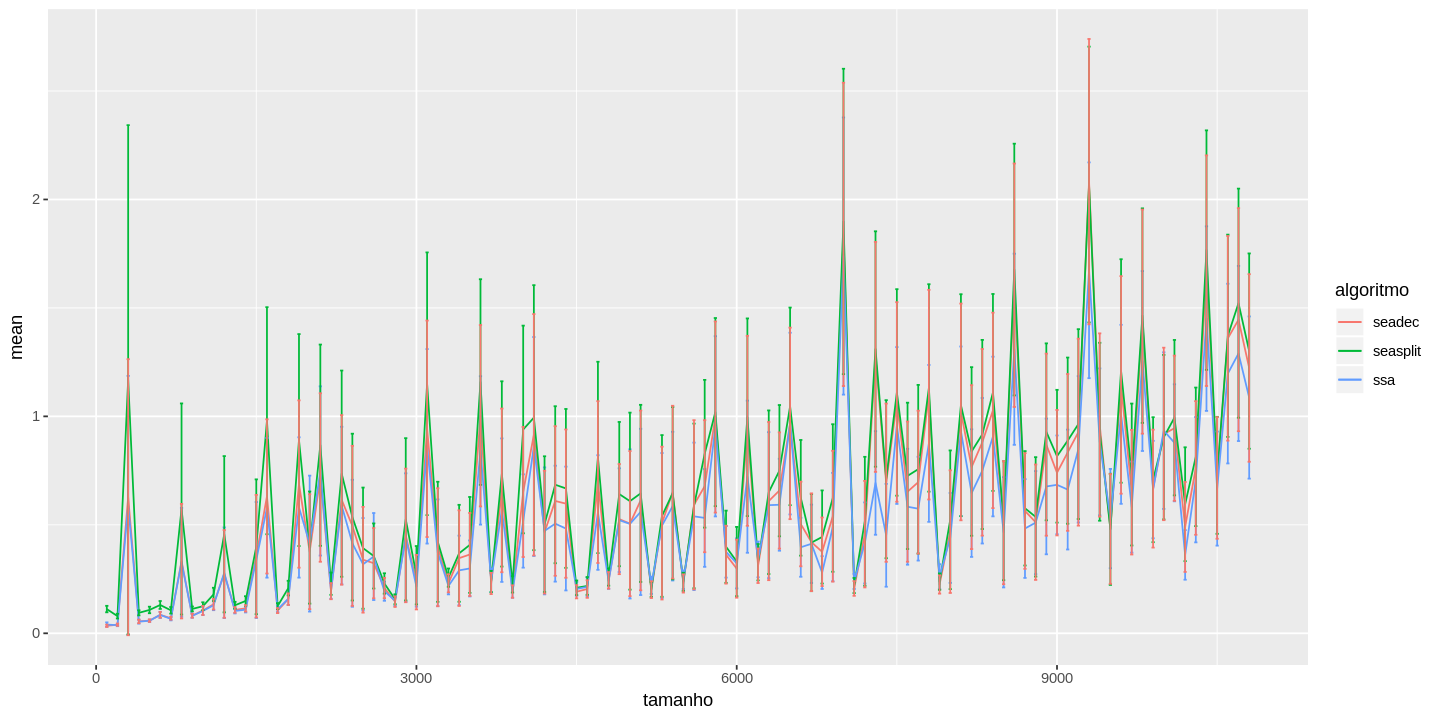

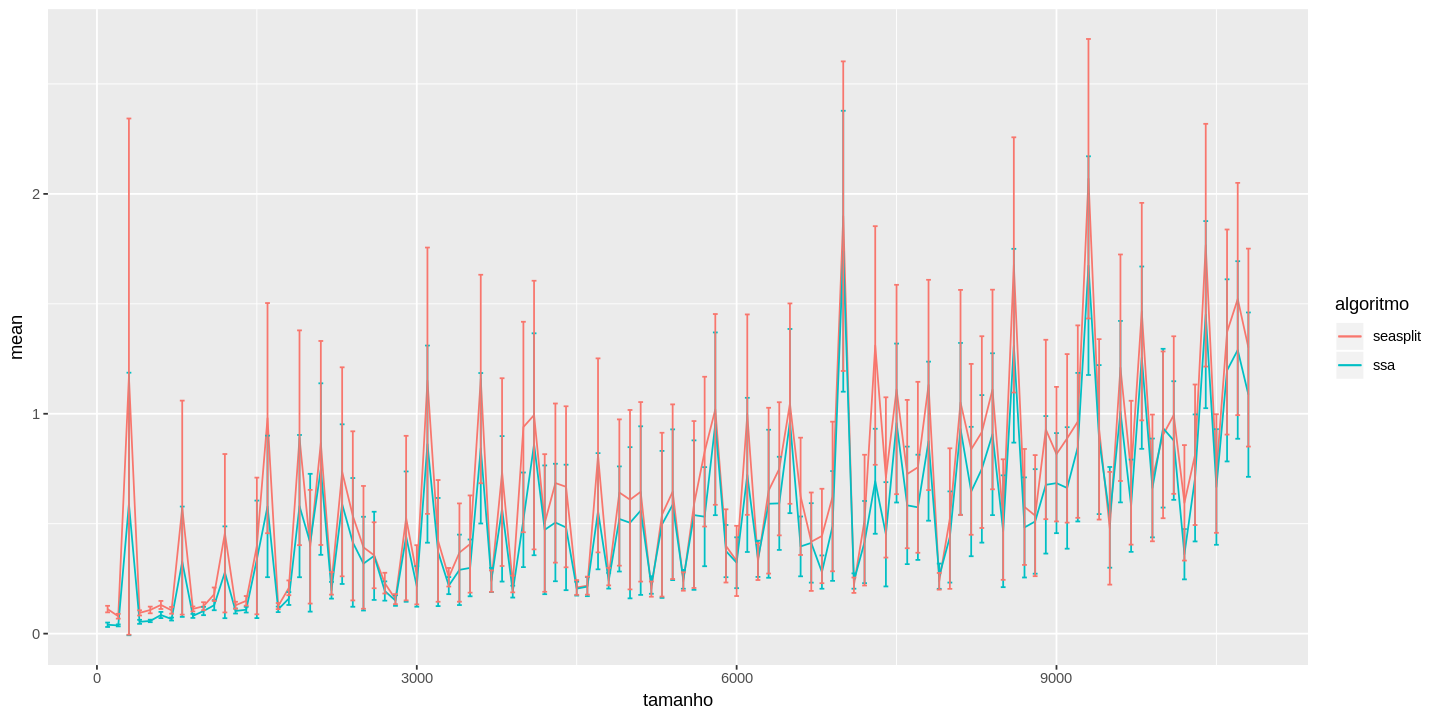

In [168]:
options(repr.plot.width=12)
 a=   ggplot(todosMedia[which((todosMedia$algoritmo=="seadec" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="ssa")) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
a

ggplot(todosMedia[which((todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="ssa")) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

Comparação enttre os melhores algoritmos de cada categoria
==

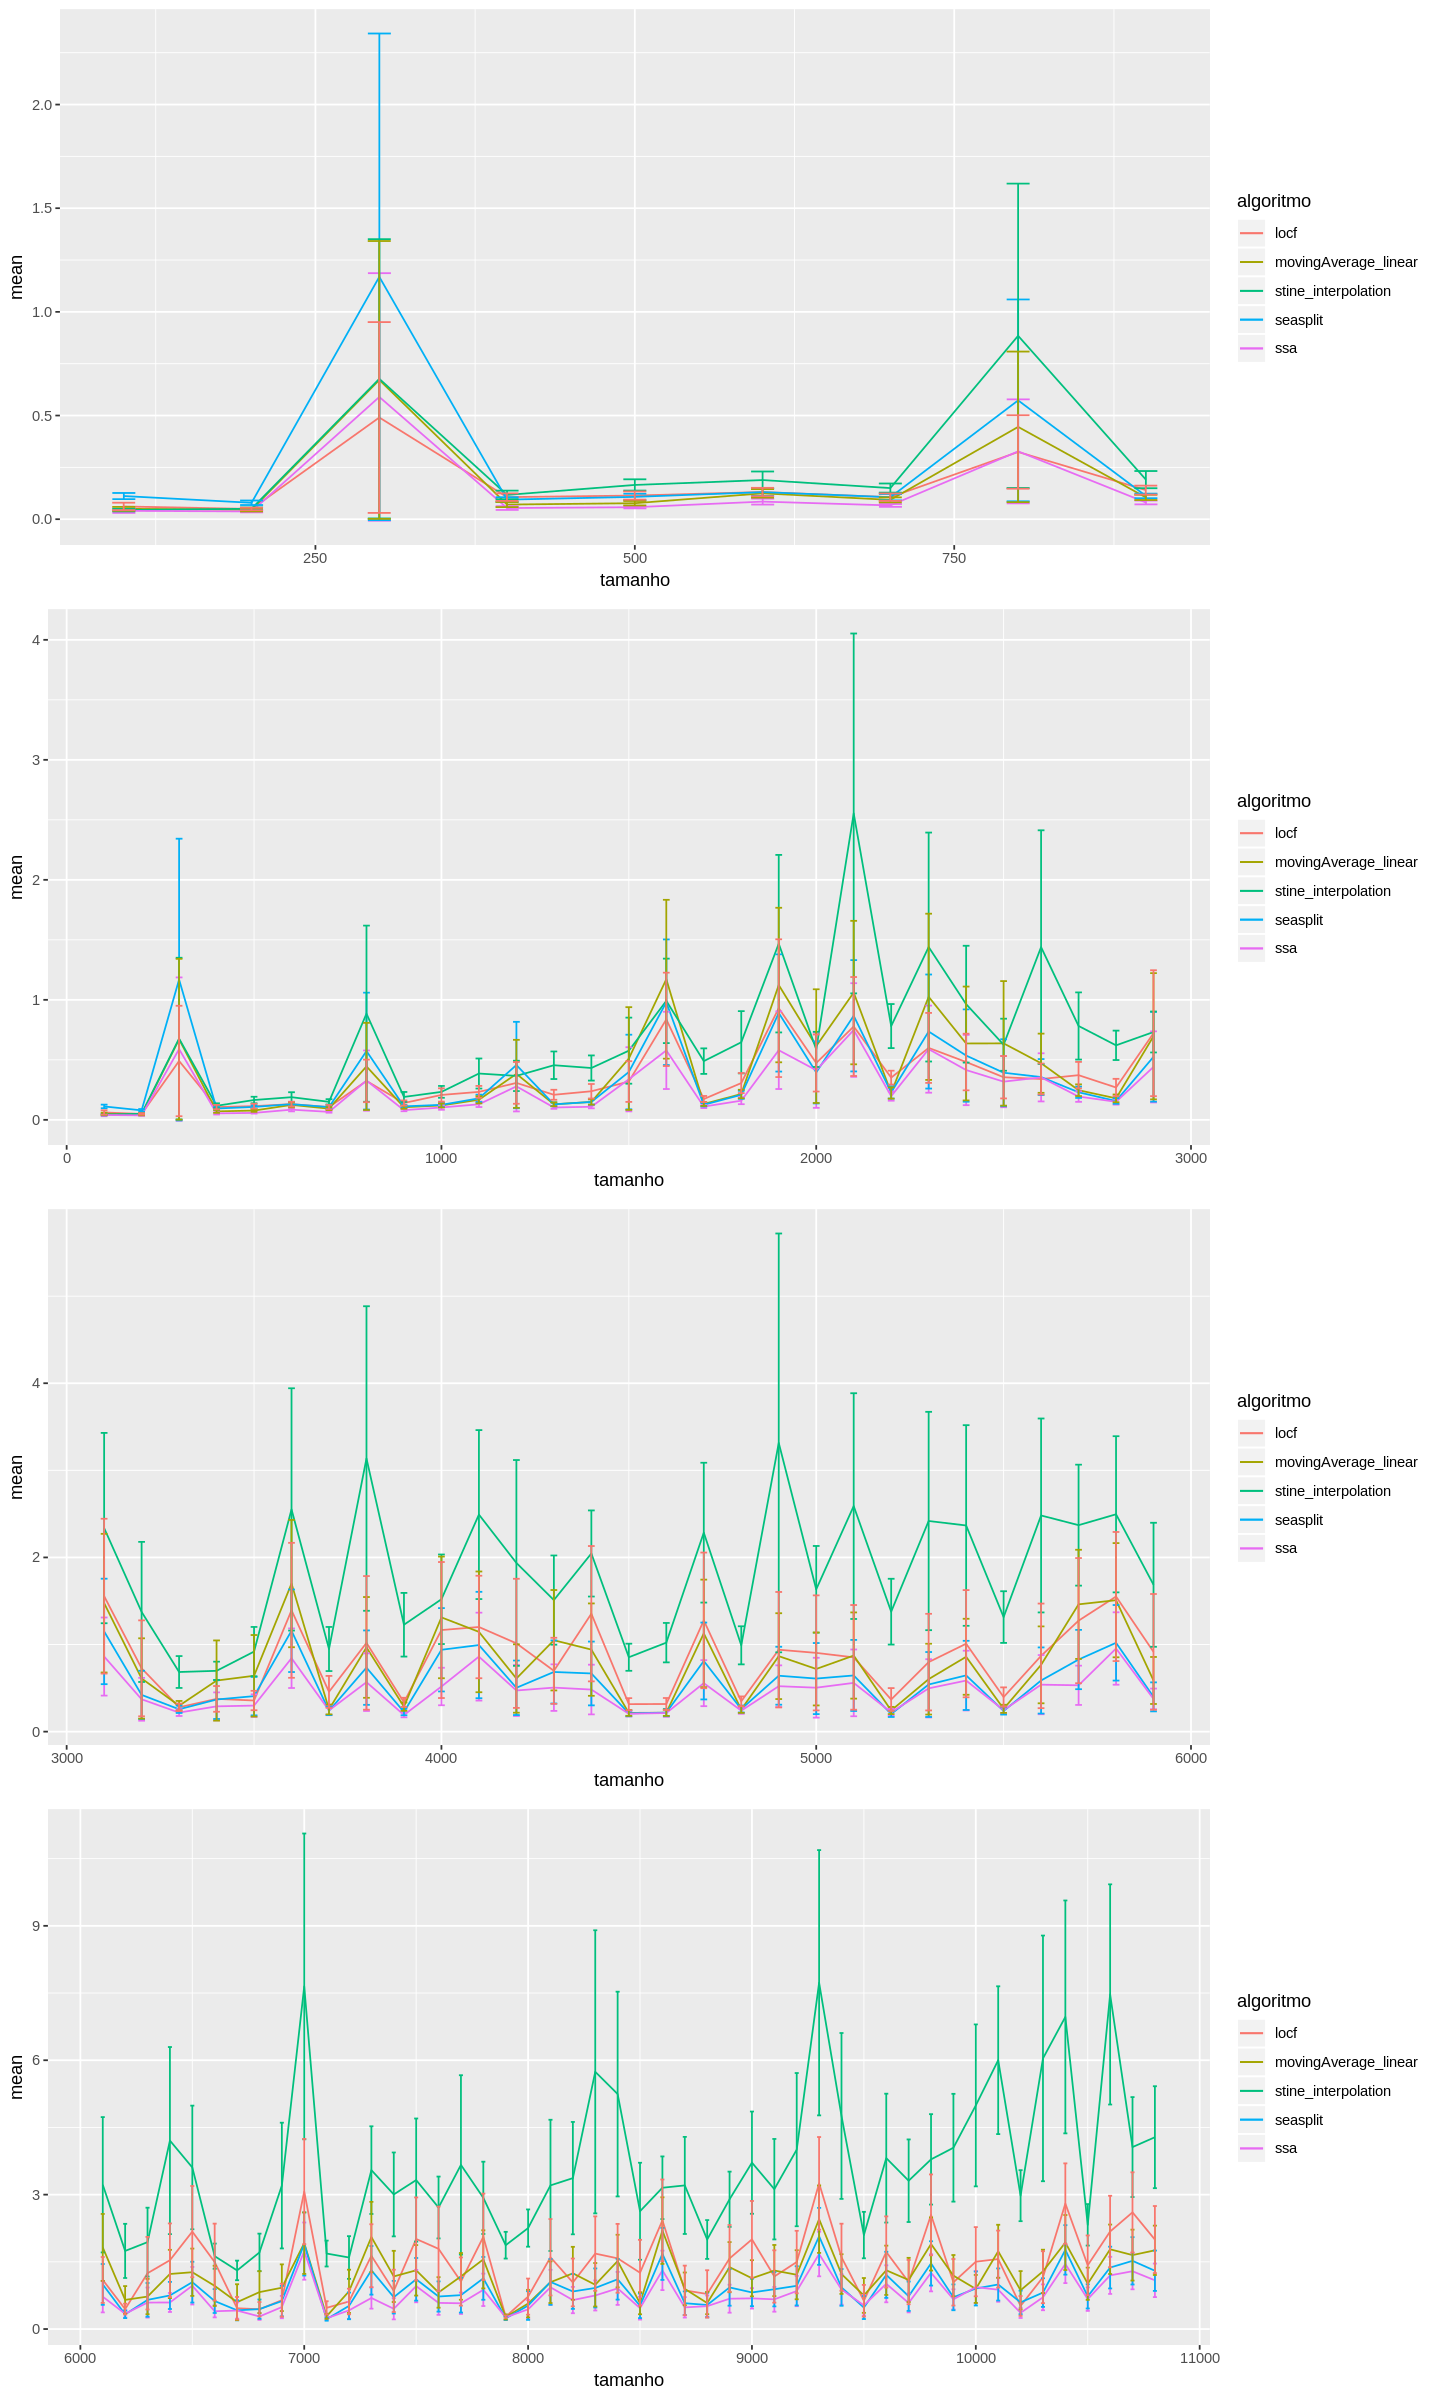

In [169]:
options(repr.plot.width=12, repr.plot.height=20)
q0=ggplot(todosMedia[which((todosMedia$algoritmo=="stine_interpolation" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho<1000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
q1=ggplot(todosMedia[which((todosMedia$algoritmo=="stine_interpolation" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho<3000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
q2=ggplot(todosMedia[which((todosMedia$algoritmo=="stine_interpolation" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho>3000 & todosMedia$tamanho<6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

q3= ggplot(todosMedia[which((todosMedia$algoritmo=="stine_interpolation" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho>6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

grid.arrange(q0, q1, q2,q3, ncol=1)

Comparação enttre os melhores algoritmos de cada categoria
==
Sem Stine. 
NOTA:
--
SSA é o melhor algoritmo para lacunas grandes consecutivas até próximo a 3000 perdas. A partir daí, se iguala estatisticamente com seasplit e depois de 6000 ambos se igualam a media móvel linear 

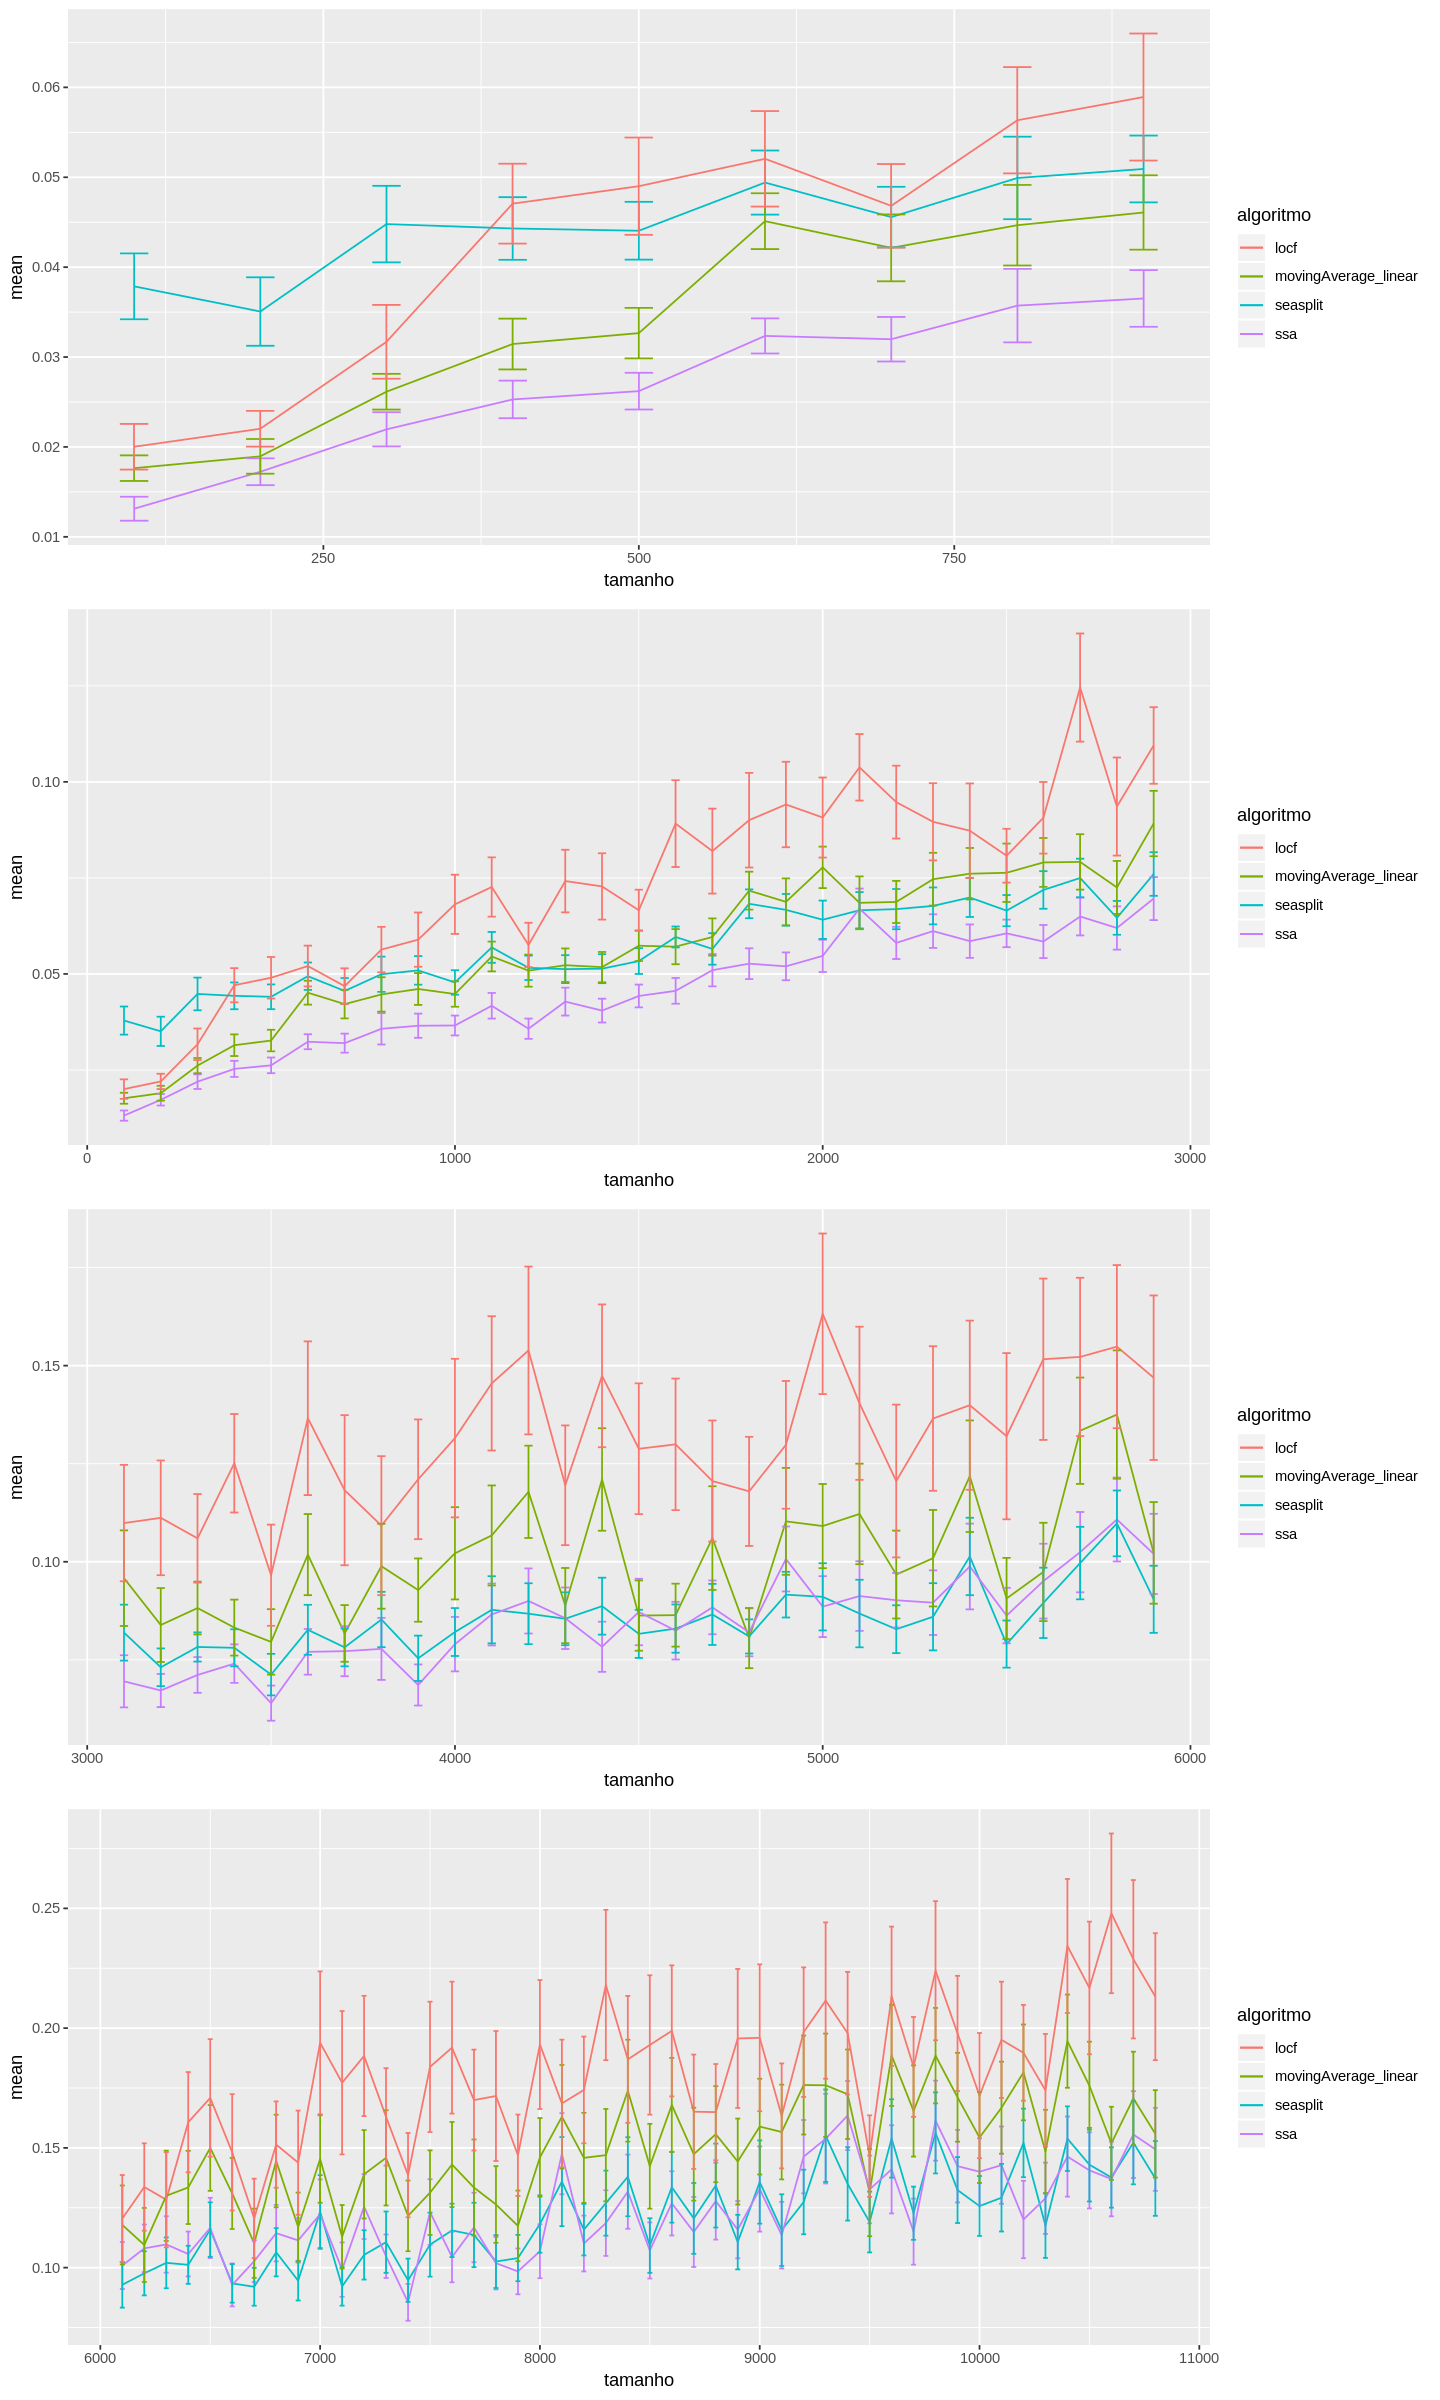

In [153]:
options(repr.plot.width=12, repr.plot.height=20)
q0=ggplot(todosMedia[which((todosMedia$algoritmo=="" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho<1000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
q1=ggplot(todosMedia[which((todosMedia$algoritmo=="" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho<3000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
q2=ggplot(todosMedia[which((todosMedia$algoritmo=="" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho>3000 & todosMedia$tamanho<6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

q3= ggplot(todosMedia[which((todosMedia$algoritmo=="" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_linear" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="locf") & todosMedia$tamanho>6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

grid.arrange(q0, q1, q2,q3, ncol=1)

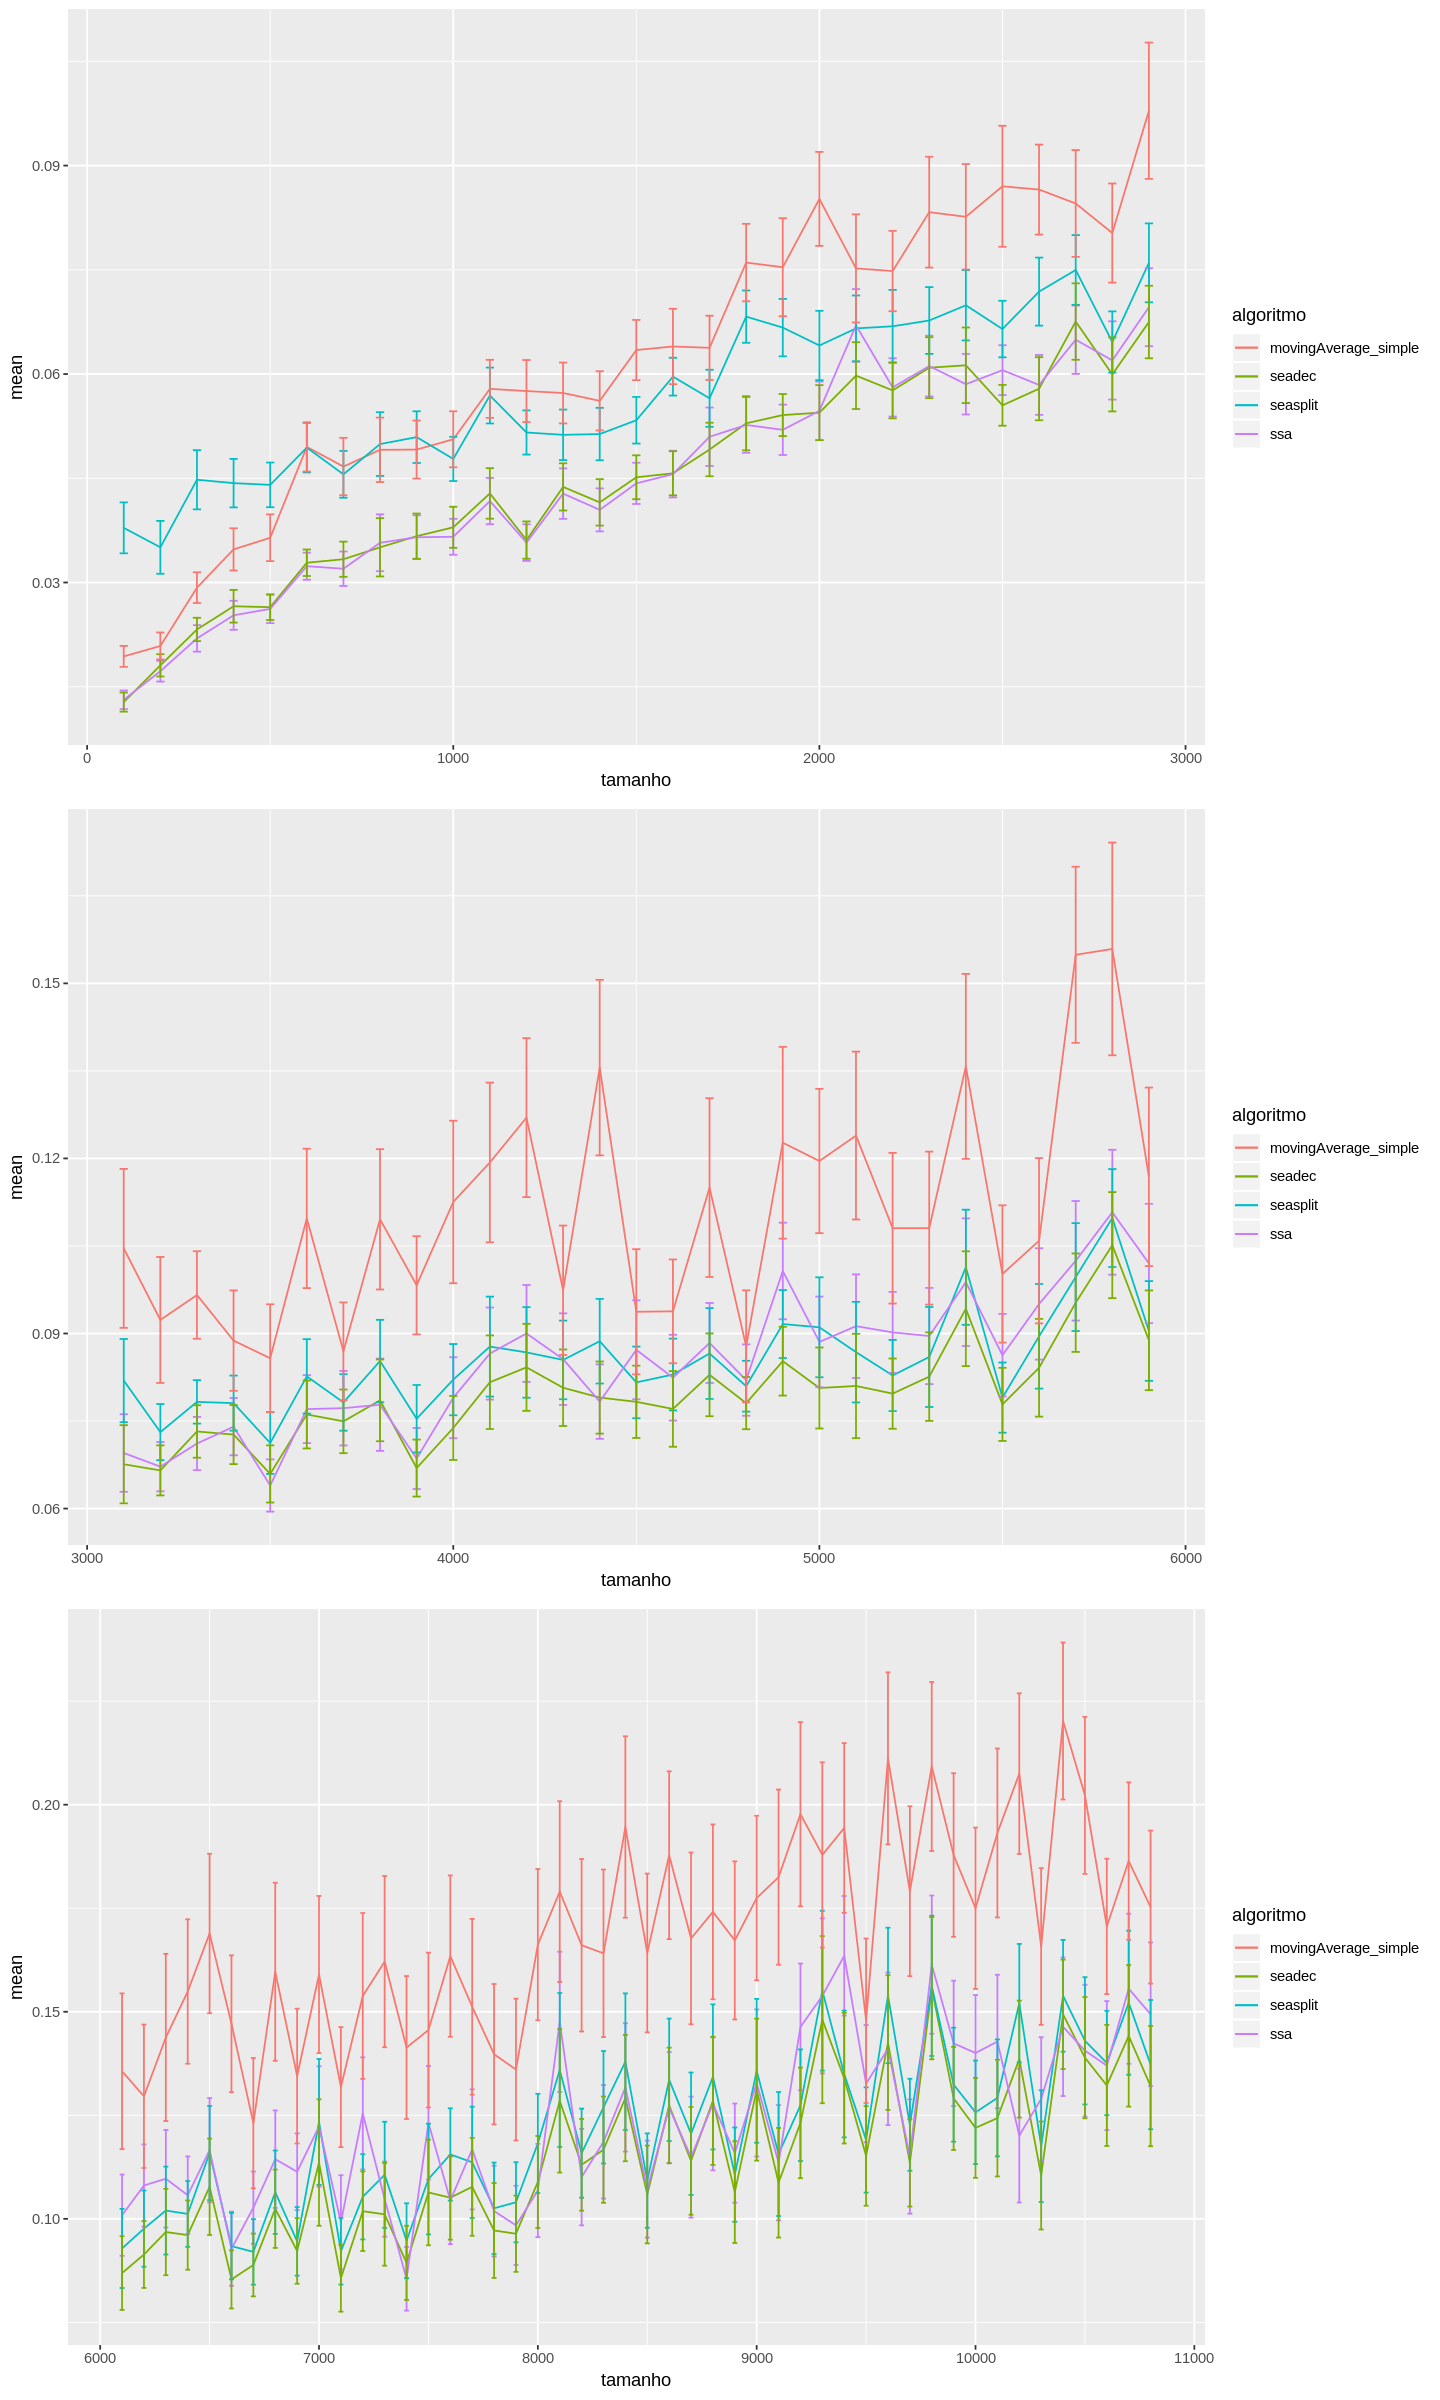

In [89]:
options(repr.plot.width=12, repr.plot.height=20)
q1=ggplot(todosMedia[which((todosMedia$algoritmo=="seadec" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_simple" | todosMedia$algoritmo=="ssa") & todosMedia$tamanho<3000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())
q2=ggplot(todosMedia[which((todosMedia$algoritmo=="seadec" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_simple" | todosMedia$algoritmo=="ssa") & todosMedia$tamanho>3000 & todosMedia$tamanho<6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

q3= ggplot(todosMedia[which((todosMedia$algoritmo=="seadec" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="movingAverage_simple" | todosMedia$algoritmo=="ssa")  & todosMedia$tamanho>6000) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

grid.arrange(q1, q2,q3, ncol=1)

Nota
---
Iterpolação, seadec e ssa são iguais estatisticamente


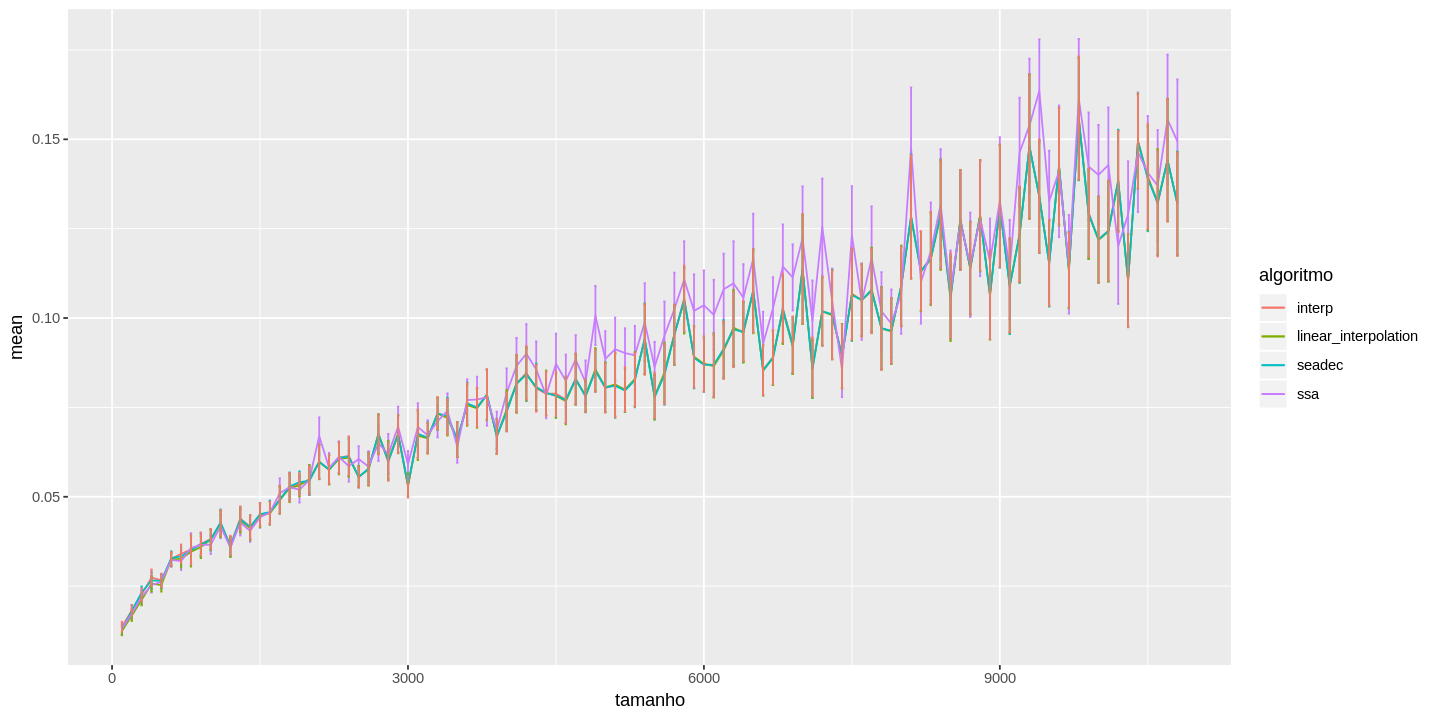

In [36]:
options(repr.plot.width=12, repr.plot.height=6)
    ggplot(todosMedia[which(todosMedia$algoritmo=="interp"| todosMedia$algoritmo=="linear_interpolation" | todosMedia$algoritmo=="seadec"| todosMedia$algoritmo=="ssa") ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +

    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())


Nota
===
Os algoritmos Seasplit e SSA apresentam comportamentos distintos. 
De 100 a 3000 o SSA é melhor que o Seasplit, entretanto, após esse pontos os dois convergem para a igualdade. 

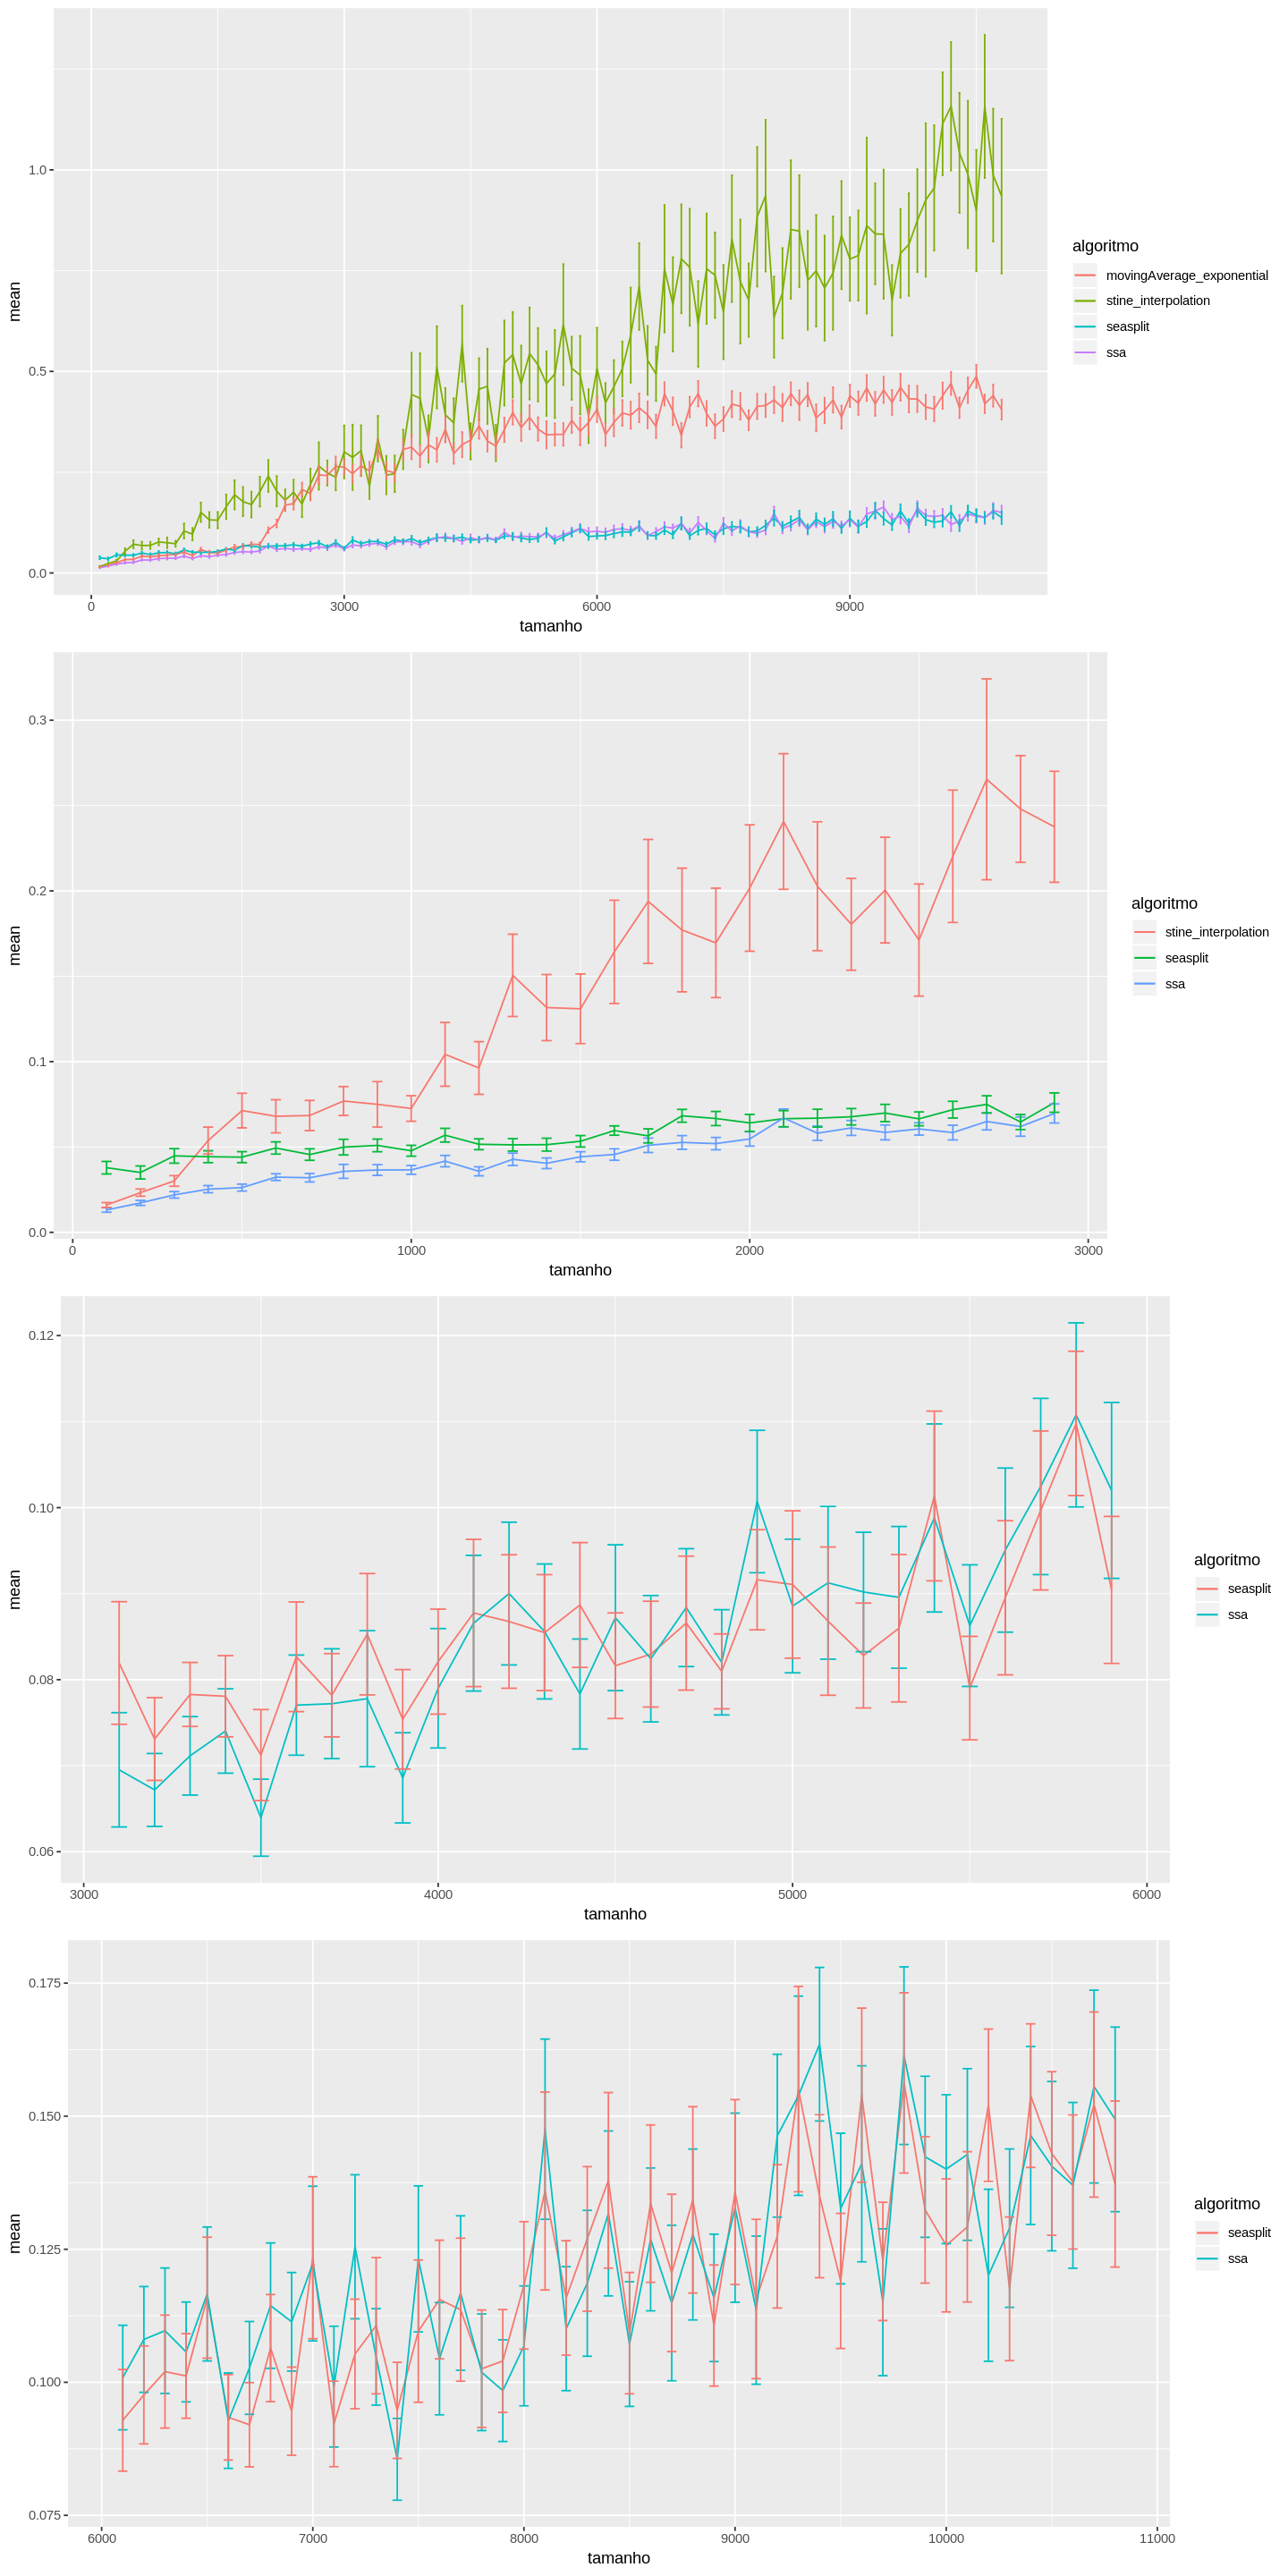

In [93]:
options(repr.plot.width=12, repr.plot.height=24)
   q1= ggplot(todosMedia[which(todosMedia$algoritmo=="seasplit"| todosMedia$algoritmo=="ssa" |  todosMedia$algoritmo=="movingAverage_exponential" |  todosMedia$algoritmo=="stine_interpolation") ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

q2=ggplot(todosMedia[which((todosMedia$tamanho<3000) & (todosMedia$algoritmo=="seasplit"| todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="stine_interpolation")) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

q3=ggplot(todosMedia[which((todosMedia$tamanho>3000 & todosMedia$tamanho<6000 ) & (todosMedia$algoritmo=="seasplit"| todosMedia$algoritmo=="ssa" )) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

q4=ggplot(todosMedia[which((todosMedia$tamanho>6000) & (todosMedia$algoritmo=="seasplit"| todosMedia$algoritmo=="ssa")) ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    #geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())
grid.arrange(q1,q2,q3,q4, ncol=1)

In [55]:
a= todosMedia
#by_alg=arrange(a, tamanho, mean)
by_alg=group_by(a, tamanho, algoritmo)
by_length=summarise(by_alg, media=min(mean))
a=by_length%>% filter(media==min(media))
a

tamanho algoritmo                 media     
1    100    seadec                    0.03466503
2    200    linear_interpolation      0.03630796
3    300    movingAverage_exponential 0.44860742
4    400    ssa                       0.05379208
5    500    linear_interpolation      0.05557689
6    600    ssa                       0.08482801
7    700    ssa                       0.06639480
8    800    movingAverage_exponential 0.26431760
9    900    linear_interpolation      0.08015819
10  1000    ssa                       0.10307295
11  1100    ssa                       0.12943953
12  1200    movingAverage_exponential 0.25247788
13  1300    ssa                       0.10294646
14  1400    ssa                       0.10896102
15  1500    ssa                       0.33796028
16  1600    ssa                       0.57864586
17  1700    interp                    0.10475655
18  1800    linear_interpolation      0.15554860
19  1900    movingAverage_exponential 0.54729114
20  2000    seadec                    0.37625565
21  2100    movingAverage_exponential 0.60283563
22  2200    linear_interpolation      0.19382568
23  2300    movingAverage_exponential 0.46212488
24  2400    movingAverage_exponential 0.32450181
25  2500    movingAverage_exponential 0.30109131
26  2600    seadec                    0.32330561
27  2700    ssa                       0.19392566
28  2800    interp                    0.14512106
29  2900    ssa                       0.44131446
30  3000    ssa                       0.21489730
⋮   ⋮       ⋮                         ⋮         
79   7900   linear_interpolation      0.2238118 
80   8000   ssa                       0.4396080 
81   8100   movingAverage_exponential 0.7929389 
82   8200   ssa                       0.6463477 
83   8300   ssa                       0.7494139 
84   8400   movingAverage_exponential 0.8190945 
85   8500   ssa                       0.4657129 
86   8600   movingAverage_exponential 0.8052171 
87   8700   ssa                       0.4830471 
88   8800   ssa                       0.5102827 
89   8900   ssa                       0.6768720 
90   9000   ssa                       0.6844760 
91   9100   ssa                       0.6626489 
92   9200   ssa                       0.8480960 
93   9300   movingAverage_exponential 0.8499778 
94   9400   movingAverage_exponential 0.8809449 
95   9500   seasplit                  0.4792532 
96   9600   movingAverage_exponential 0.8182395 
97   9700   ssa                       0.5818482 
98   9800   movingAverage_exponential 0.8952948 
99   9900   ssa                       0.6626460 
100 10000   movingAverage_exponential 0.8311332 
101 10100   ssa                       0.8782513 
102 10200   ssa                       0.3612627 
103 10300   ssa                       0.7081417 
104 10400   movingAverage_exponential 0.8679578 
105 10500   ssa                       0.6670573 
106 10600   movingAverage_exponential 0.8846864 
107 10700   movingAverage_exponential 0.9150558 
108 10800   movingAverage_exponential 0.9162504

Métrica: MSE
---

In [56]:
todosMedia=todos %>%
  group_by(algoritmo, tamanho) %>%
  summarize(mean = mean(mse, na.rm = TRUE))
#head(todosMedia)

In [58]:
options(repr.plot.width=12)
mse=ggplot(todosMedia, aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    ggtitle("MSE")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    theme(plot.title = element_text(hjust = 0.5, size=10))

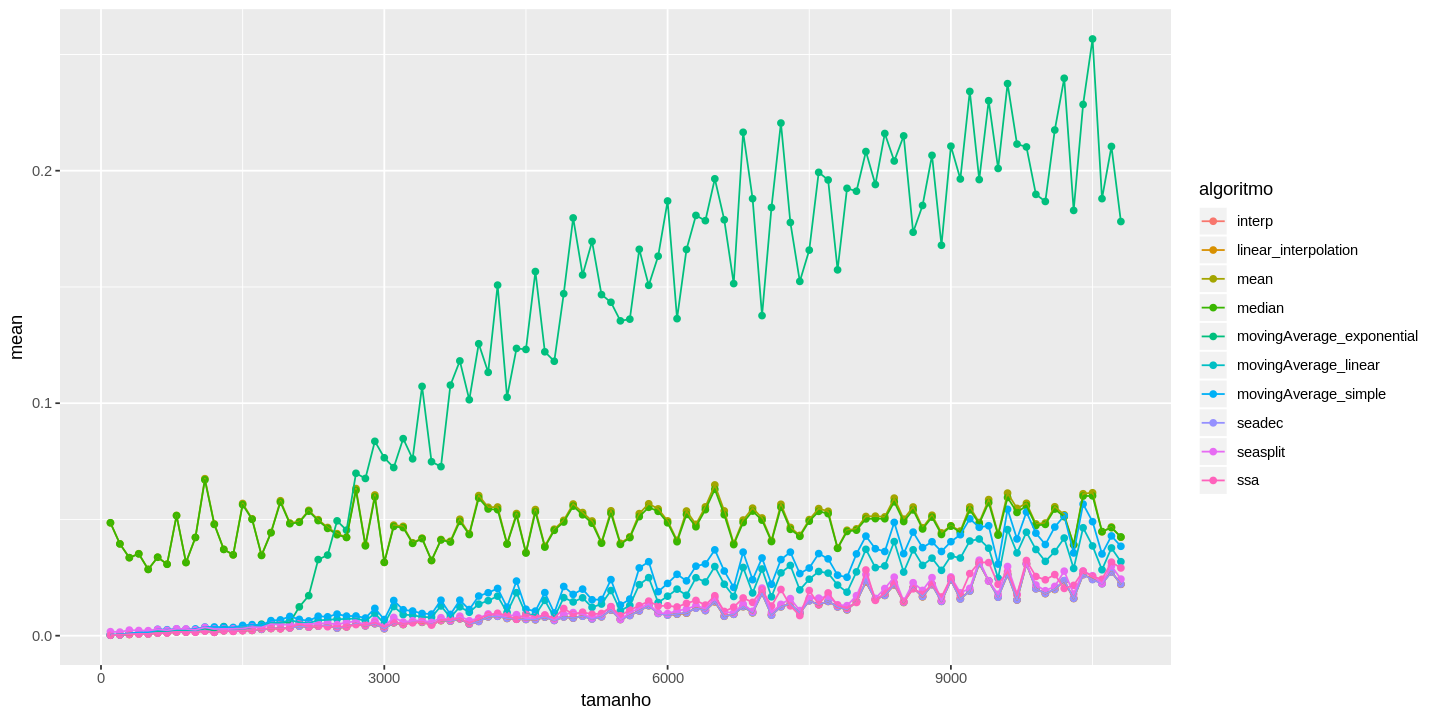

In [59]:
options(repr.plot.width=12)
    ggplot(todosMedia[which(todosMedia$tamanho<40000 & todosMedia$algoritmo!="spline_interpolation"  & todosMedia$algoritmo!="mode"  & todosMedia$algoritmo!="stine_interpolation" 
),], aes(x=tamanho, y=mean, colour=algoritmo))+
geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

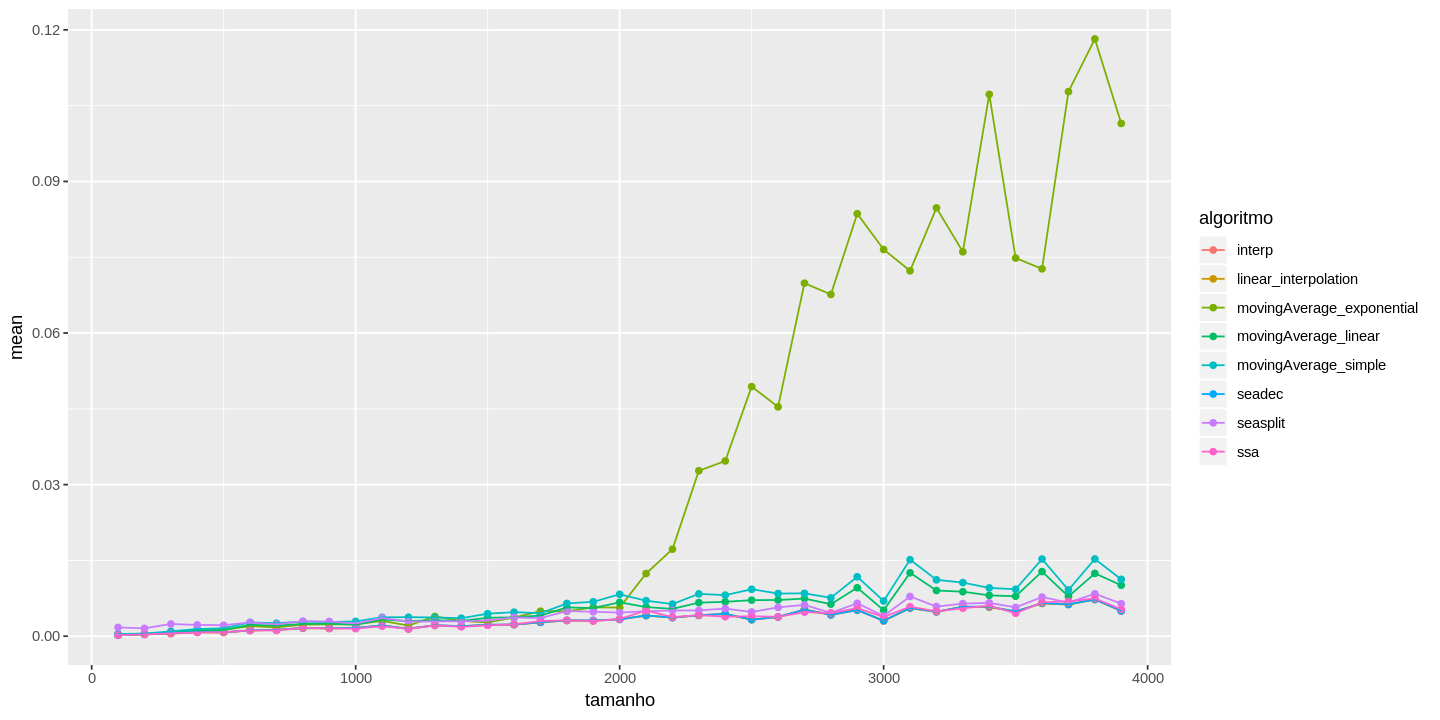

In [60]:
options(repr.plot.width=12)
    ggplot(todosMedia[which(todosMedia$tamanho<4000 & todosMedia$algoritmo!="spline_interpolation"  & todosMedia$algoritmo!="mode" & todosMedia$algoritmo!="median"  & todosMedia$algoritmo!="mean" & todosMedia$algoritmo!="stine_interpolation" 
),], aes(x=tamanho, y=mean, colour=algoritmo))+
geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

In [61]:
a= todosMedia
#by_alg=arrange(a, tamanho, mean)
by_alg=group_by(a, tamanho, algoritmo)
by_length=summarise(by_alg, media=min(mean))
a=by_length%>% filter(media==min(media))
a

tamanho algoritmo            media       
1    100    linear_interpolation 0.0001852747
2    200    linear_interpolation 0.0003317610
3    300    linear_interpolation 0.0005018356
4    400    ssa                  0.0007384049
5    500    linear_interpolation 0.0007171605
6    600    ssa                  0.0011330262
7    700    ssa                  0.0011618033
8    800    linear_interpolation 0.0015814857
9    900    linear_interpolation 0.0015093824
10  1000    ssa                  0.0014897807
11  1100    ssa                  0.0019922869
12  1200    ssa                  0.0014353631
13  1300    ssa                  0.0021300207
14  1400    ssa                  0.0018539844
15  1500    ssa                  0.0021591368
16  1600    linear_interpolation 0.0022883299
17  1700    linear_interpolation 0.0027298910
18  1800    linear_interpolation 0.0030988342
19  1900    ssa                  0.0029982544
20  2000    seadec               0.0033193975
21  2100    interp               0.0040913302
22  2200    linear_interpolation 0.0036857811
23  2300    linear_interpolation 0.0040989639
24  2400    ssa                  0.0038561997
25  2500    interp               0.0032599990
26  2600    linear_interpolation 0.0037751780
27  2700    ssa                  0.0047654969
28  2800    interp               0.0042076444
29  2900    seadec               0.0051711731
30  3000    interp               0.0030106247
⋮   ⋮       ⋮                    ⋮           
79   7900   linear_interpolation 0.01114419  
80   8000   ssa                  0.01428771  
81   8100   linear_interpolation 0.02313290  
82   8200   ssa                  0.01518983  
83   8300   linear_interpolation 0.01729602  
84   8400   linear_interpolation 0.02185786  
85   8500   linear_interpolation 0.01426335  
86   8600   ssa                  0.02016637  
87   8700   linear_interpolation 0.01672103  
88   8800   seadec               0.02192816  
89   8900   seadec               0.01475011  
90   9000   linear_interpolation 0.02386426  
91   9100   seadec               0.01578951  
92   9200   linear_interpolation 0.01920933  
93   9300   linear_interpolation 0.03101997  
94   9400   seasplit             0.02352119  
95   9500   seadec               0.01653683  
96   9600   seadec               0.02631610  
97   9700   interp               0.01536366  
98   9800   linear_interpolation 0.03087836  
99   9900   seadec               0.02017539  
100 10000   linear_interpolation 0.01810622  
101 10100   linear_interpolation 0.01985219  
102 10200   ssa                  0.02034107  
103 10300   linear_interpolation 0.01598812  
104 10400   interp               0.02623120  
105 10500   seadec               0.02415424  
106 10600   seadec               0.02232025  
107 10700   seadec               0.02739070  
108 10800   interp               0.02208491

Métrica: MAE
---

In [62]:
todosMedia=todos %>%
  group_by(algoritmo, tamanho) %>%
  summarize(mean = mean(mae, na.rm = TRUE))
#head(todosMedia)

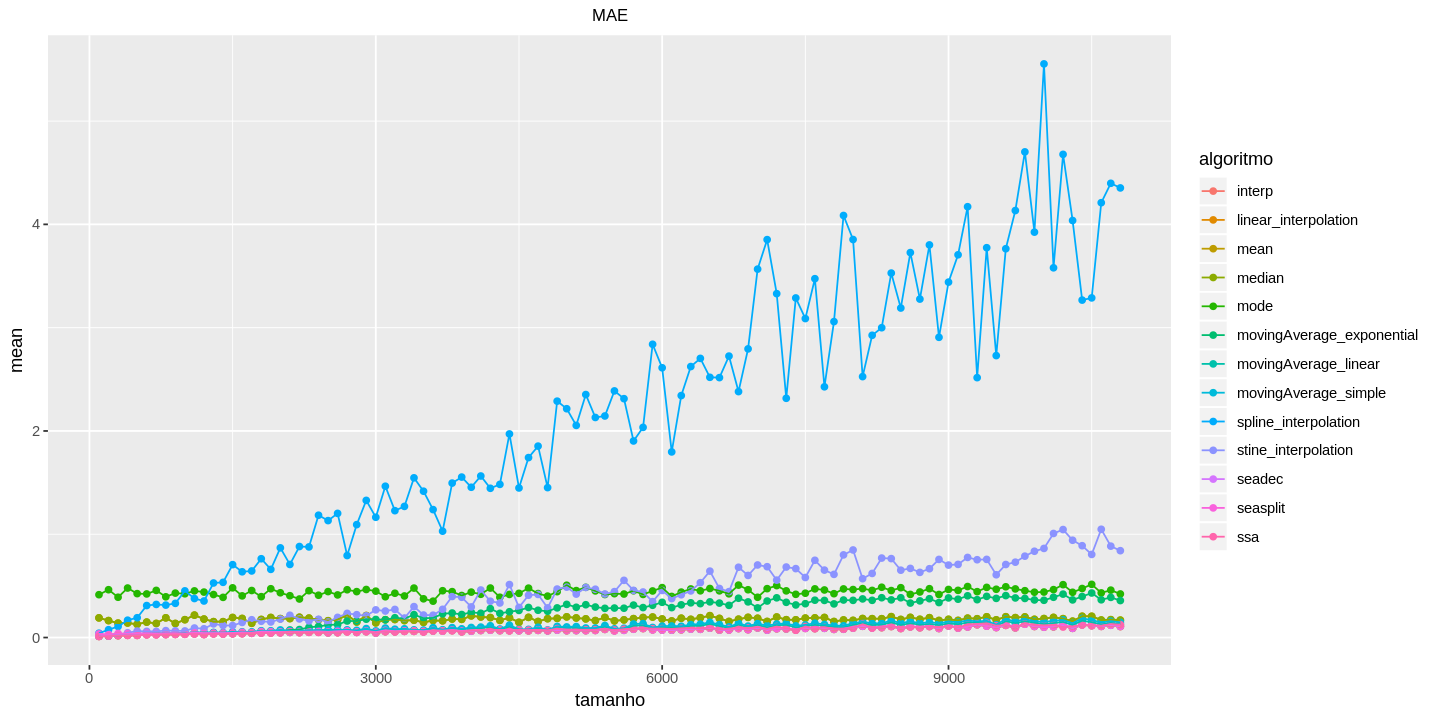

In [63]:
options(repr.plot.width=12)
mae=ggplot(todosMedia, aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    ggtitle("MAE")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
mae

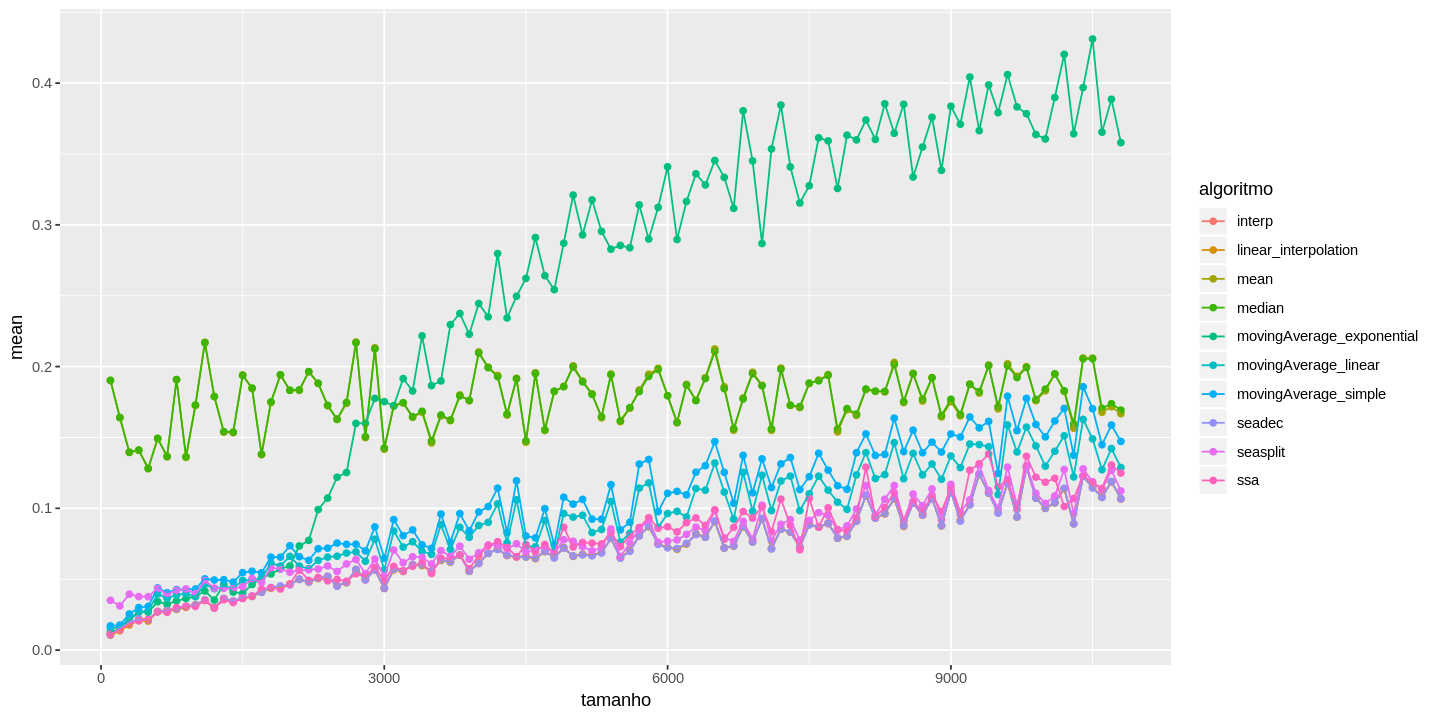

In [64]:
options(repr.plot.width=12)
    ggplot(todosMedia[which(todosMedia$tamanho<40000 & todosMedia$algoritmo!="spline_interpolation"  & todosMedia$algoritmo!="mode"  & todosMedia$algoritmo!="stine_interpolation" 
),], aes(x=tamanho, y=mean, colour=algoritmo))+
geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

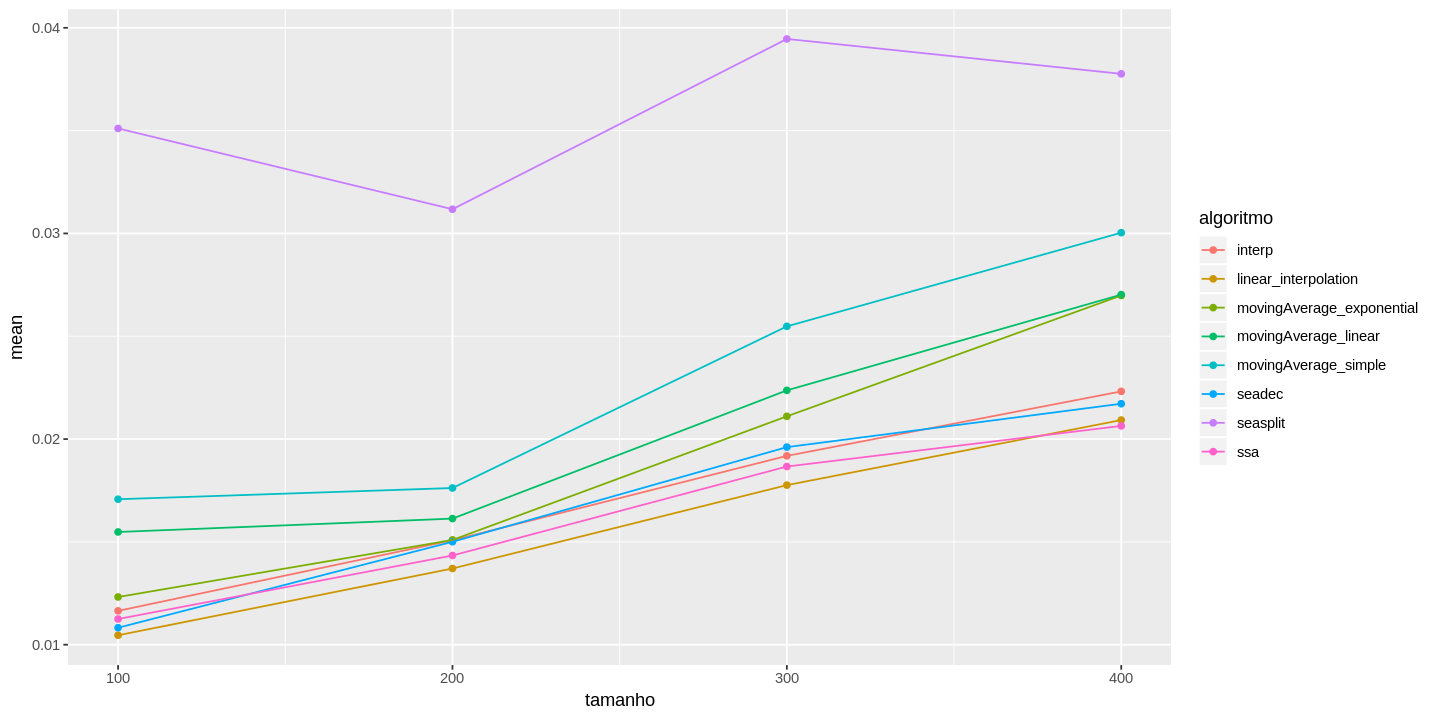

In [65]:
options(repr.plot.width=12)
    ggplot(todosMedia[which(todosMedia$tamanho<500 & todosMedia$algoritmo!="spline_interpolation"  & todosMedia$algoritmo!="mode" & todosMedia$algoritmo!="median"  & todosMedia$algoritmo!="mean" & todosMedia$algoritmo!="stine_interpolation" 
),], aes(x=tamanho, y=mean, colour=algoritmo))+
geom_point()+
    geom_line()+
      #  theme(axis.text=element_text(size=1))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())

In [66]:
a= todosMedia
#by_alg=arrange(a, tamanho, mean)
by_alg=group_by(a, tamanho, algoritmo)
by_length=summarise(by_alg, media=min(mean))
a=by_length%>% filter(media==min(media))
a

tamanho algoritmo            media     
1    100    linear_interpolation 0.01045886
2    200    linear_interpolation 0.01370574
3    300    linear_interpolation 0.01776018
4    400    ssa                  0.02064181
5    500    linear_interpolation 0.02050021
6    600    ssa                  0.02696202
7    700    ssa                  0.02666826
8    800    linear_interpolation 0.02873644
9    900    linear_interpolation 0.03012252
10  1000    ssa                  0.03080239
11  1100    ssa                  0.03501053
12  1200    ssa                  0.02964598
13  1300    ssa                  0.03550819
14  1400    ssa                  0.03348846
15  1500    ssa                  0.03637588
16  1600    linear_interpolation 0.03784565
17  1700    linear_interpolation 0.04080297
18  1800    linear_interpolation 0.04363895
19  1900    ssa                  0.04308850
20  2000    seadec               0.04609270
21  2100    linear_interpolation 0.04982899
22  2200    linear_interpolation 0.04797679
23  2300    linear_interpolation 0.05046508
24  2400    ssa                  0.04885069
25  2500    seadec               0.04518754
26  2600    linear_interpolation 0.04751713
27  2700    ssa                  0.05389142
28  2800    interp               0.04941391
29  2900    interp               0.05666339
30  3000    interp               0.04338717
⋮   ⋮       ⋮                    ⋮         
79   7900   linear_interpolation 0.08024321
80   8000   interp               0.09090280
81   8100   linear_interpolation 0.10891299
82   8200   linear_interpolation 0.09305693
83   8300   linear_interpolation 0.09605629
84   8400   linear_interpolation 0.10677876
85   8500   linear_interpolation 0.08721903
86   8600   seadec               0.10354785
87   8700   linear_interpolation 0.09524746
88   8800   seadec               0.10681998
89   8900   linear_interpolation 0.08759734
90   9000   seadec               0.11186084
91   9100   seadec               0.09100117
92   9200   seadec               0.10247053
93   9300   linear_interpolation 0.12387440
94   9400   linear_interpolation 0.11072244
95   9500   seadec               0.09663193
96   9600   linear_interpolation 0.11773039
97   9700   linear_interpolation 0.09384785
98   9800   linear_interpolation 0.12909130
99   9900   seadec               0.10718535
100 10000   linear_interpolation 0.09991023
101 10100   linear_interpolation 0.10377686
102 10200   ssa                  0.10128975
103 10300   seadec               0.08910436
104 10400   seadec               0.12257083
105 10500   seadec               0.11438526
106 10600   interp               0.10769579
107 10700   interp               0.11876950
108 10800   interp               0.10660691

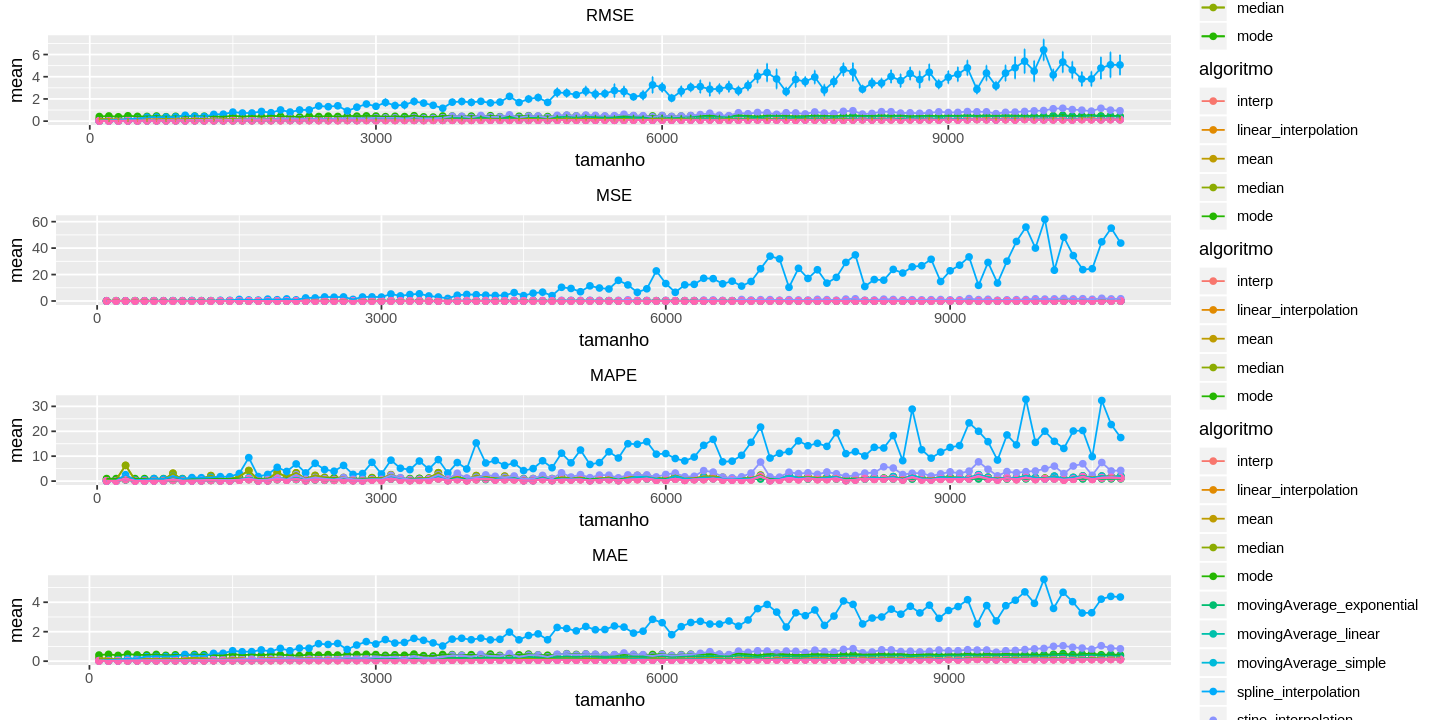

In [67]:
grid.arrange(rmse, mse, mape,mae, ncol=1)

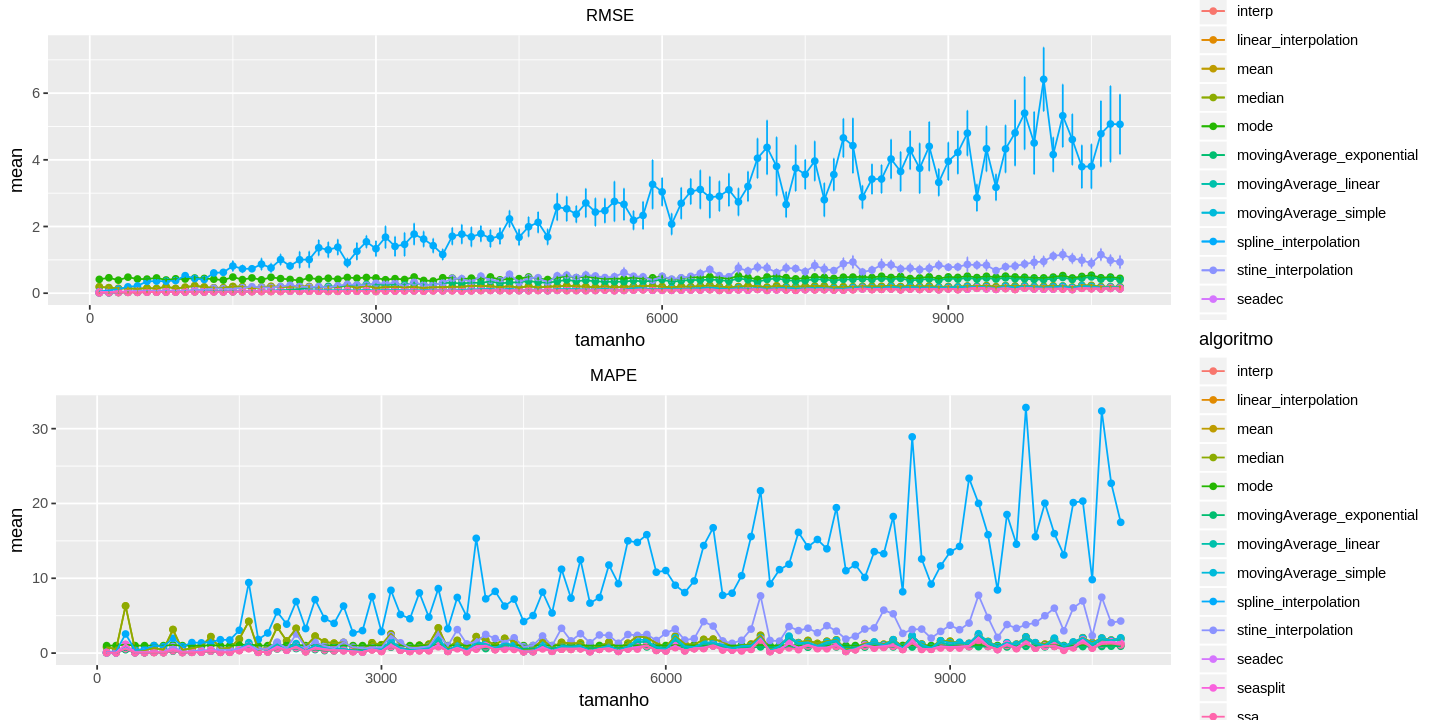

In [68]:
grid.arrange(rmse,mape, ncol=1)


Tempo
==


In [1]:
algoritmo=read.table("../expOriginal/time/alg.txt")
tempo=read.table("../expOriginal/time/tempo.txt")
a=as.data.frame(cbind(algoritmo, tempo))
names(a)=c("algoritmo", "tempo")
a$tamanho=rep(seq(100,10800,100), each=30)
a$tempo=as.numeric(hms(a$tempo))

b=a

mediaTempo= a %>% group_by(algoritmo, tamanho) %>%
summarize(tempo = mean(tempo, na.rm = TRUE))

sdTempo = a %>% group_by(algoritmo, tamanho) %>%
summarize(sd=sd(tempo, na.rm=TRUE))
mediaTempo$sd=sdTempo$sd

n=30 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200...
error=qnorm(0.975)*mediaTempo$sd/sqrt(n)
mediaTempo$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.2) # move them .05 to the left and right



algTempo=ggplot(mediaTempo, aes(x=tamanho, y=tempo, colour=algoritmo))+
	geom_line()+
    geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) 
    #+geom_point()

ggplot(mediaTempo[which(mediaTempo$algoritmo=="" | mediaTempo$tamanho<1000),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()#+ geom_point()


ERROR: Error in hms(a$tempo): could not find function "hms"


Médias móveis
==

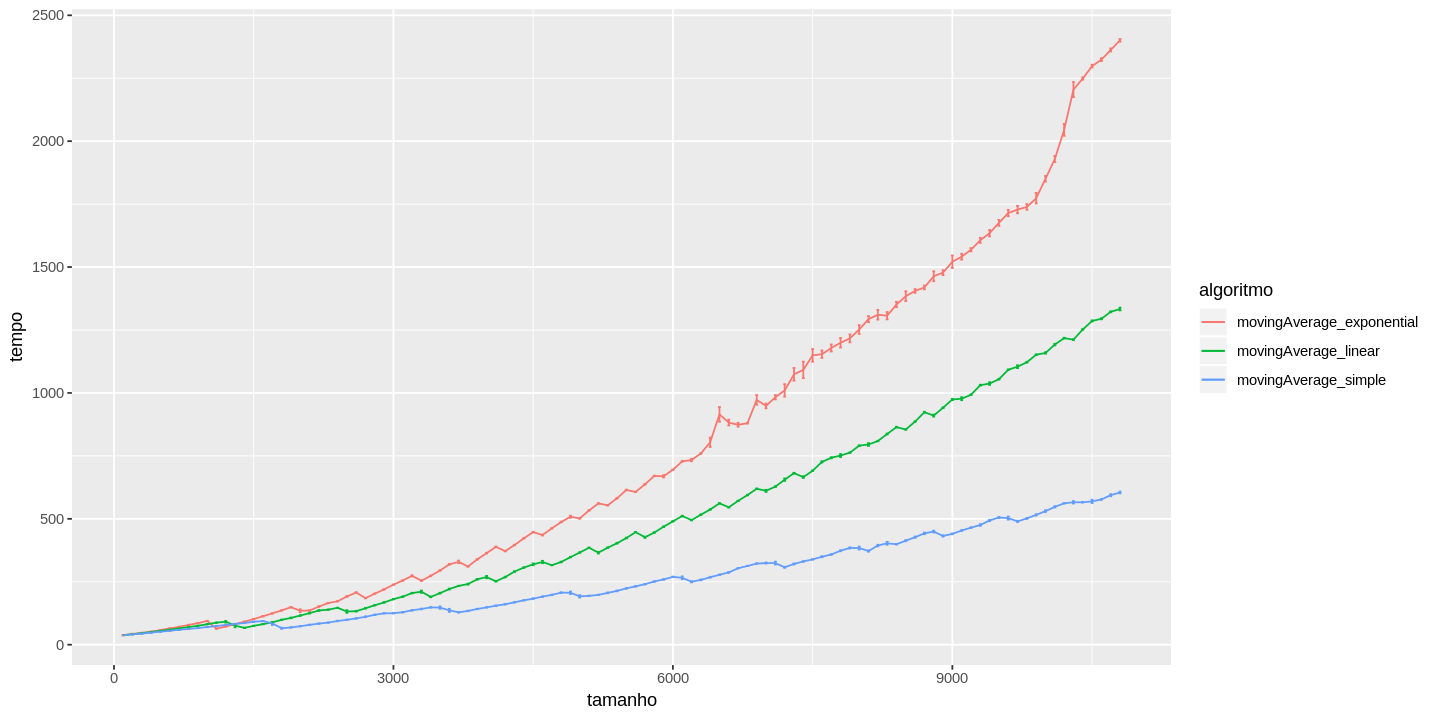

In [12]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(mediaTempo[which((mediaTempo$algoritmo=="movingAverage_linear" | mediaTempo$algoritmo=="movingAverage_exponential" | mediaTempo$algoritmo=="movingAverage_simple")),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()#+ geom_point()

Media, mediana e moda
===
Média e mediana tem melhores tempos, entretando na média. 
Moda é ruim em tempo e RMSE. 
Media e mediana são equivalente, entretanto optoo-se por usar a média.


In [5]:
options(repr.plot.width=12, repr.plot.height=6)
t1=ggplot(mediaTempo[which((mediaTempo$algoritmo=="mean" | mediaTempo$algoritmo=="median" | mediaTempo$algoritmo=="locf")),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()#+ geom_point()


rmse1= ggplot(todosMedia[which(todosMedia$algoritmo=="mean" | todosMedia$algoritmo=="median" | todosMedia$algoritmo=="locf") ,], aes(x=tamanho, y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))

grid.arrange(t1, rmse1, ncol=1)
                  

ERROR: Error in ggplot(mediaTempo[which((mediaTempo$algoritmo == "movingAverage_linear" | : object 'mediaTempo' not found


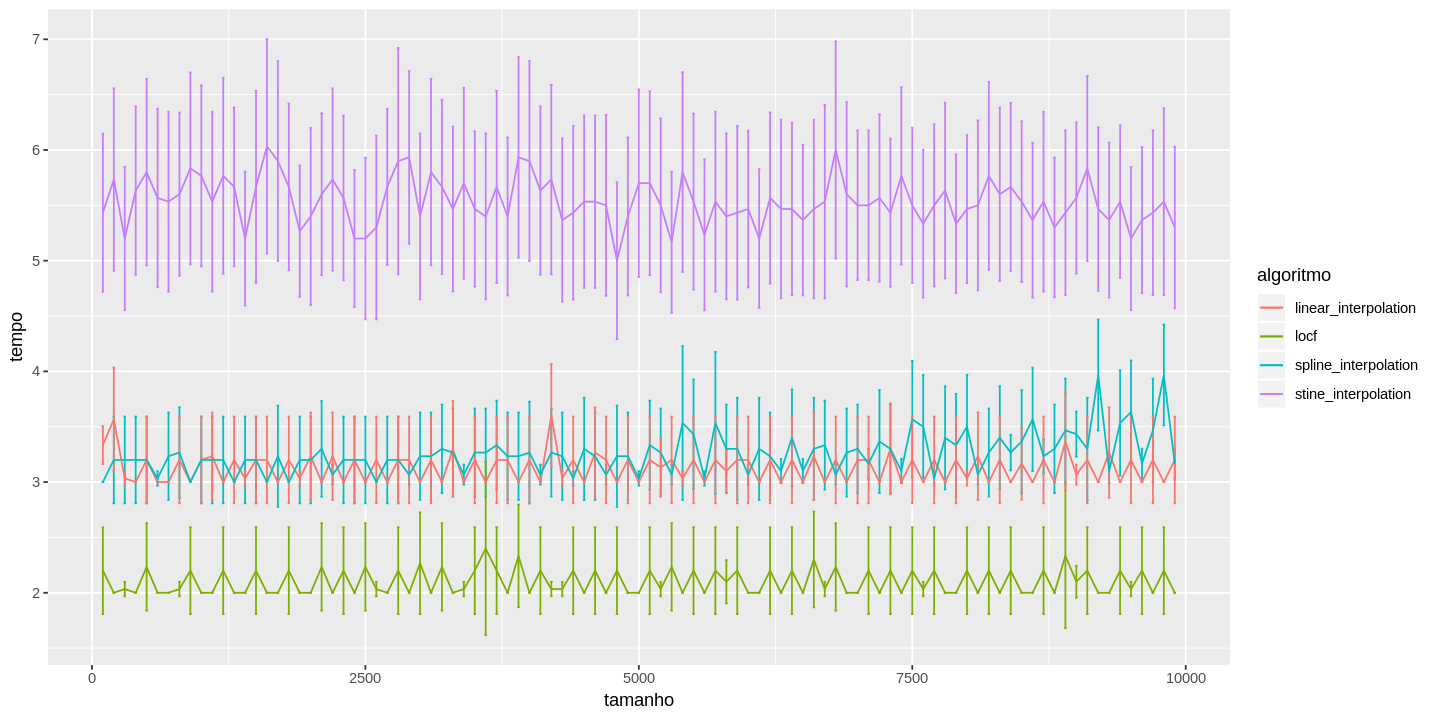

In [124]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(mediaTempo[which((mediaTempo$algoritmo=="spline_interpolation" | mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="linear_interpolation" | mediaTempo$algoritmo=="locf") & mediaTempo$tamanho<10000),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()#+ geom_point()

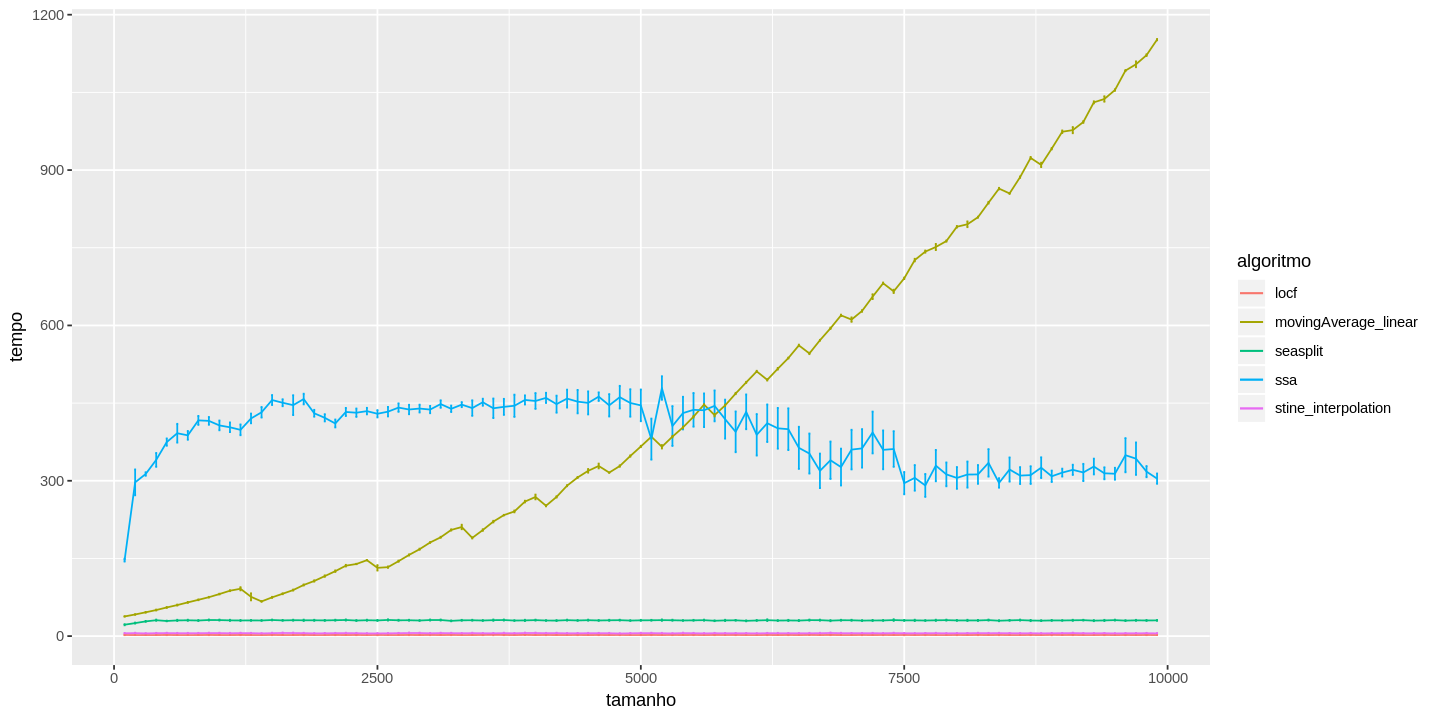

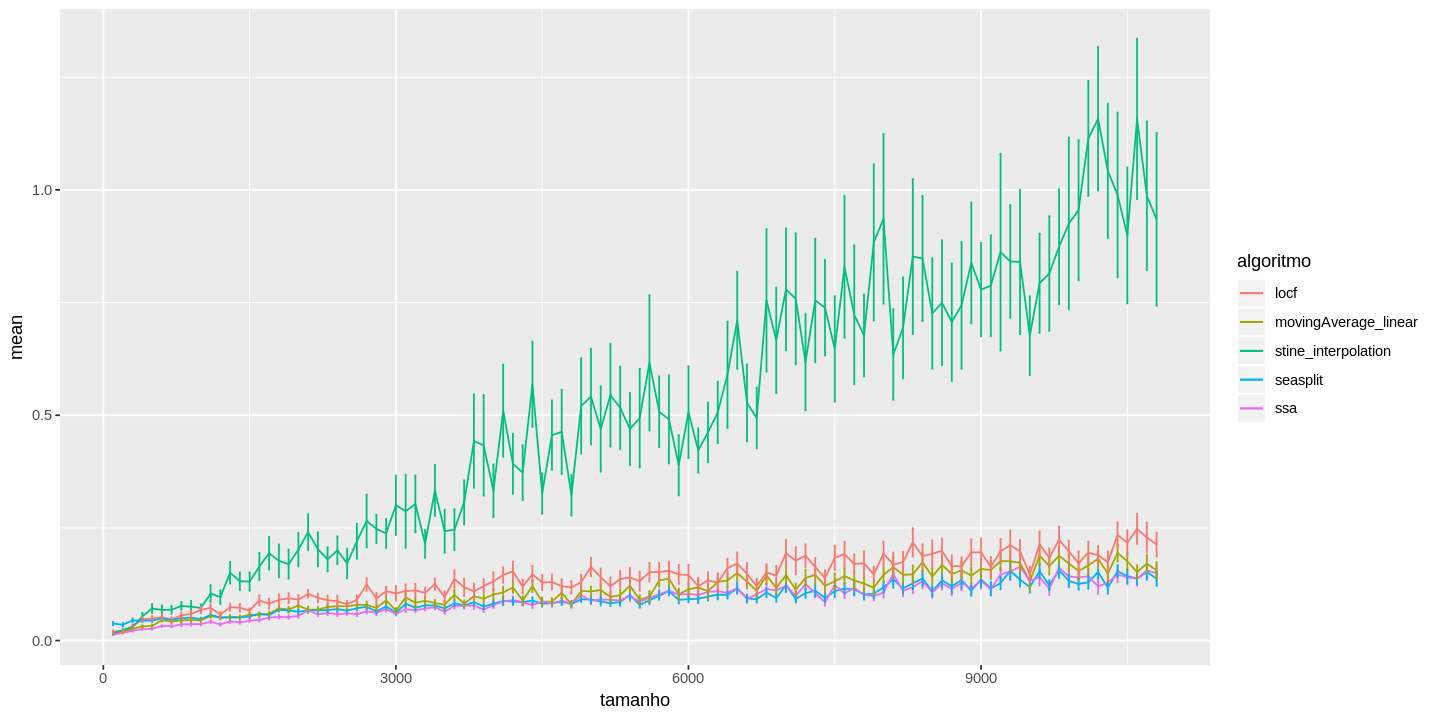

In [178]:
tempoMelhores= options(repr.plot.width=12, repr.plot.height=6)
ggplot(mediaTempo[which((mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="ssa" | mediaTempo$algoritmo=="movingAverage_linear" | mediaTempo$algoritmo=="locf" | mediaTempo$algoritmo=="seasplit") & mediaTempo$tamanho<10000),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()
rmseMelhores

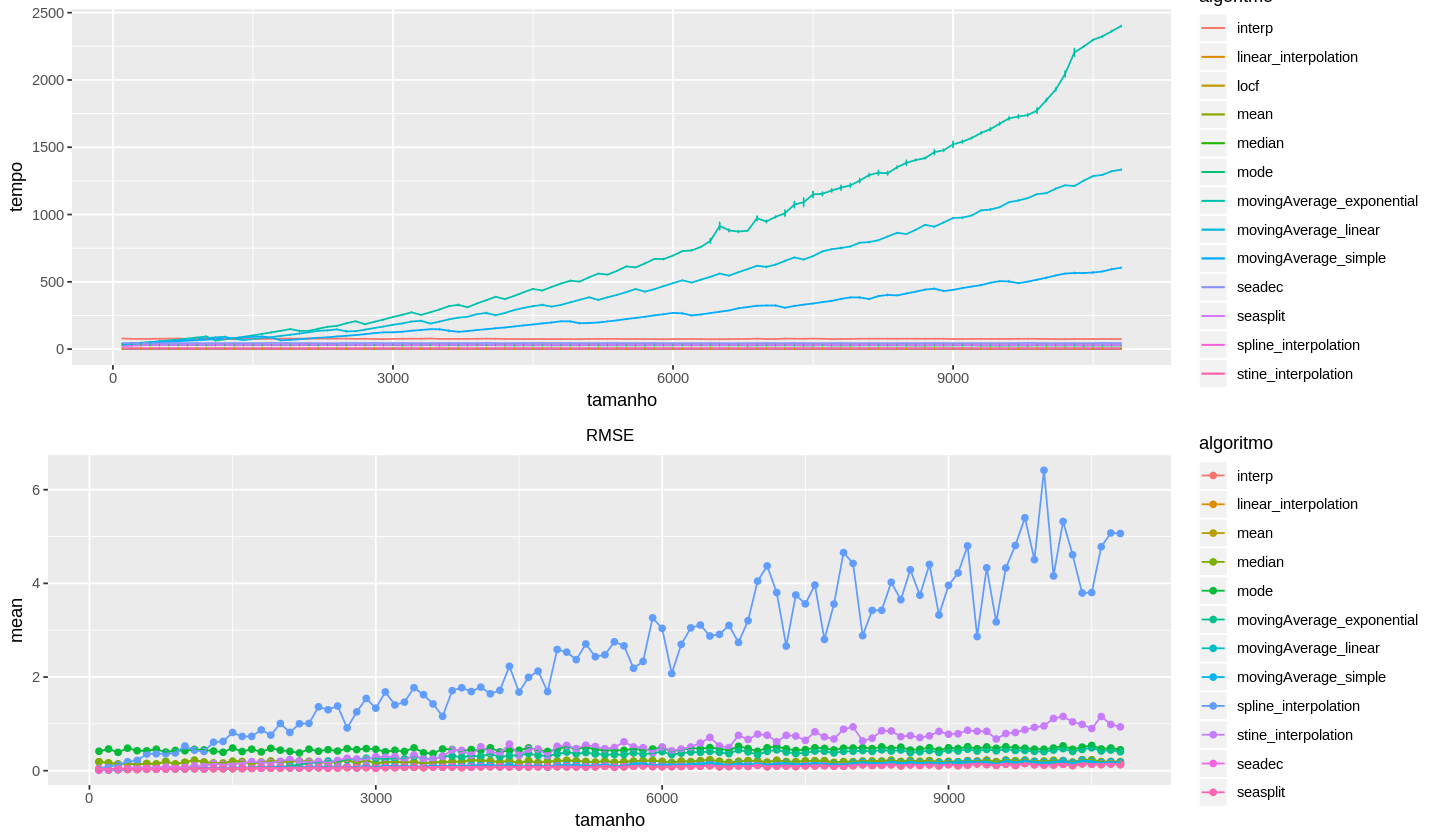

In [300]:
grid.arrange(algTempo, rmse, ncol=1)